In [1]:
from datetime import datetime
from hashlib import sha1
from math import sqrt
import neptune
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [2]:
from config import *

In [3]:
# Initializing Neptune -> Machine Learning test tracking
neptune.init(USERNAME + "/" + MY_PROJECT)

Project(gretchenriggs/Verifli)

### Getting IR pics data input table from csv

In [4]:
def clean_X(df):
    df['date_time'] = pd.to_datetime(df['date_time'],  format="%Y-%m-%d %H:%M:%S")
    df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
    df['date'] = df['date'].map(lambda x: pd.Timestamp(x))
    df.drop(["Unnamed: 0"], axis=1, inplace=True)
    return df

In [5]:
prev_df = pd.read_csv(DIR + "data/processed/current/" + 
                      "dataprep_unfiltered_2019-02-18_comb_darksky_FeatNameUpd_pt1-16.csv")
prev_df = clean_X(prev_df)
prev_df

,Deep10,Deep8,Med10,Med8,Shal10,Shal8,api_call,apparenttemperature,apparenttemperaturehigh,apparenttemperaturelow,...,uvindexdaily,visibility,visibilitydaily,wind_chill,windbearing,windbearingdaily,windgust,windgustdaily,windspeed,windspeeddaily
0,0.0,4.0,0.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,61.890000,92.89,72.01,...,11.0,9.997000,9.997,61.890000,111.875000,190.0,3.675000,7.83,3.457500,3.59
1,0.0,4.0,0.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,61.890000,92.89,72.01,...,11.0,9.997000,9.997,61.890000,111.875000,190.0,3.675000,7.83,3.457500,3.59
2,0.0,2.0,0.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,61.890000,92.89,72.01,...,11.0,9.997000,9.997,61.890000,111.875000,190.0,3.675000,7.83,3.457500,3.59
3,0.0,2.0,0.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,61.890000,92.89,72.01,...,11.0,9.997000,9.997,61.890000,111.875000,190.0,3.675000,7.83,3.457500,3.59
4,2.0,0.0,1.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,61.863167,92.89,72.01,...,11.0,9.997000,9.997,61.863167,114.666667,190.0,4.475833,7.83,4.475833,3.59
5,2.0,0.0,1.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,61.863167,92.89,72.01,...,11.0,9.997000,9.997,61.863167,114.666667,190.0,4.475833,7.83,4.475833,3.59
6,0.0,0.0,3.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,61.851667,92.89,72.01,...,11.0,9.997000,9.997,61.851667,116.666667,190.0,4.418333,7.83,4.418333,3.59
7,0.0,0.0,3.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,61.844000,92.89,72.01,...,11.0,9.997000,9.997,61.844000,118.000000,190.0,4.380000,7.83,4.380000,3.59
8,0.0,0.0,3.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,69.953833,95.03,65.13,...,9.0,9.997000,9.238,69.243000,158.900000,181.0,3.614000,8.49,3.614000,3.90
9,0.0,0.0,3.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,69.953833,95.03,65.13,...,9.0,9.997000,9.238,69.243000,158.900000,181.0,3.614000,8.49,3.614000,3.90


In [6]:
print(sorted(prev_df.columns))

['Deep10', 'Deep8', 'Med10', 'Med8', 'Shal10', 'Shal8', 'api_call', 'apparenttemperature', 'apparenttemperaturehigh', 'apparenttemperaturelow', 'area_m', 'box frames', 'camera', 'camera_sn', 'capacity_prop', 'cloudcover', 'cloudcoverdaily', 'date', 'date_time', 'deep boxes', 'dewpoint', 'dewpointddaily', 'entropy_allimg', 'entropy_max_16x8', 'entropy_max_32x16', 'entropy_max_4x2', 'entropy_max_8x4', 'entropy_mean_16x8', 'entropy_mean_32x16', 'entropy_mean_4x2', 'entropy_mean_8x4', 'entropy_median_16x8', 'entropy_median_32x16', 'entropy_median_4x2', 'entropy_median_8x4', 'entropy_min_16x8', 'entropy_min_32x16', 'entropy_min_4x2', 'entropy_min_8x4', 'entropy_std_16x8', 'entropy_std_32x16', 'entropy_std_4x2', 'entropy_std_8x4', 'filename', 'frame strength', 'frames w/ bees', 'gps_tuple', 'grower', 'heat_index', 'hive', 'hive_area', 'hive_fc', 'hive_vol', 'hour', 'hrs_from_sunrise', 'hrs_from_sunset', 'humidity', 'humiditydaily', 'iqr_temp', 'iqr_temparea_ratio', 'iqr_tempvol_ratio', 'lati

In [7]:
prev_df.describe().iloc[:,0:10]

,Deep10,Deep8,Med10,Med8,Shal10,Shal8,apparenttemperature,apparenttemperaturehigh,apparenttemperaturelow,area_m
count,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000
mean,1.197176,0.197680,0.740040,0.007312,0.092537,0.022693,67.611947,82.605986,61.591389,173.893888
std,0.903937,0.551741,1.014023,0.085209,0.346133,0.187878,13.353544,13.047713,10.215578,58.049707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.568000,52.370000,24.130000,62.900000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.270000,77.870000,58.050000,148.800000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.730833,86.800000,65.100000,177.600000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,75.724500,90.890000,70.100000,177.600000
max,2.000000,4.000000,6.000000,1.000000,3.000000,2.000000,90.051500,105.710000,75.250000,492.100000


In [8]:
prev_df.describe().iloc[:,10:20]

,box frames,capacity_prop,cloudcover,cloudcoverdaily,deep boxes,dewpoint,dewpointddaily,entropy_allimg,entropy_max_16x8,entropy_max_32x16
count,3966.000000,3966.000000,3.966000e+03,3.966000e+03,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000
mean,9.729702,0.395754,2.491720e-01,2.289208e-01,1.394856,59.658973,60.281056,1.924711,6.526344,5.570185
std,0.683851,0.304056,3.594028e-01,1.927723e-01,0.805037,11.412379,10.776731,1.072924,1.349419,1.115798
min,8.000000,0.000000,-8.640588e-12,-4.876988e-12,0.000000,29.538333,32.010000,0.150196,2.350179,1.790110
25%,10.000000,0.050000,0.000000e+00,2.000000e-02,1.000000,48.493333,49.870000,1.112886,5.407342,4.668220
50%,10.000000,0.435671,0.000000e+00,2.400000e-01,2.000000,65.696000,67.190000,1.750576,6.692662,5.672269
75%,10.000000,0.650828,4.420000e-01,3.900000e-01,2.000000,69.029333,68.540000,2.554299,7.402272,6.372660
max,10.000000,1.000000,1.000000e+00,7.200000e-01,4.000000,77.242000,75.240000,6.367218,9.745458,8.101159


In [9]:
prev_df.describe().iloc[:,20:30]

,entropy_max_4x2,entropy_max_8x4,entropy_mean_16x8,entropy_mean_32x16,entropy_mean_4x2,entropy_mean_8x4,entropy_median_16x8,entropy_median_32x16,entropy_median_4x2,entropy_median_8x4
count,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000
mean,7.263051,6.967428,4.652144,3.603364,6.496757,5.616242,4.758613,3.717399,6.558825,5.706972
std,1.567895,1.538728,1.370618,1.195720,1.537716,1.484778,1.465813,1.319847,1.560977,1.534186
min,1.917842,2.151690,0.753420,0.366045,1.649510,1.073915,0.663989,0.000000,1.762608,0.983211
25%,5.888640,5.673115,3.462116,2.576989,5.173967,4.342653,3.482243,2.584963,5.207785,4.371551
50%,7.547180,7.209195,4.871904,3.741044,6.732094,5.856097,4.984410,3.869283,6.829931,5.966321
75%,8.401340,7.991631,5.591974,4.410750,7.640974,6.703880,5.755628,4.578879,7.718348,6.826176
max,11.696156,10.969382,8.147255,6.740379,10.473055,9.436643,8.993714,7.481232,10.660871,9.834750


In [10]:
prev_df.describe().iloc[:,30:40]

,entropy_min_16x8,entropy_min_32x16,entropy_min_4x2,entropy_min_8x4,entropy_std_16x8,entropy_std_32x16,entropy_std_4x2,entropy_std_8x4,frame strength,frames w/ bees
count,3.966000e+03,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,127.000000
mean,1.603875e+00,0.294678,5.534909,3.626726,0.974230,0.978971,0.562514,0.812974,7.955947,13.992126
std,1.293094e+00,0.595867,1.579590,1.546413,0.337816,0.322484,0.245470,0.294291,6.851967,7.640219
min,-4.525647e-11,0.000000,0.752807,0.000000,0.245719,0.181828,0.092307,0.219719,0.000000,4.000000
25%,3.597776e-01,0.000000,4.348191,2.551297,0.766463,0.775552,0.397760,0.631155,0.750000,6.500000
50%,1.517381e+00,0.000000,5.557653,3.618283,0.905357,0.913931,0.529569,0.756344,8.000000,10.000000
75%,2.543953e+00,0.208187,6.758595,4.769543,1.102077,1.121885,0.681520,0.918237,12.000000,19.000000
max,6.092251e+00,4.145092,9.525697,7.971073,2.938741,2.589731,2.634067,2.894947,33.780000,32.000000


In [11]:
prev_df.describe().iloc[:,40:50]

,heat_index,hive_area,hive_vol,hour,hrs_from_sunrise,hrs_from_sunset,humidity,humiditydaily,iqr_temp,iqr_temparea_ratio
count,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.00000,3966.000000,3966.000000,3966.000000,3.966000e+03
mean,66.957713,173893.888048,82.961190,9.171710,2.214826,-10.78946,0.821010,0.770381,2.214819,1.302761e-05
std,12.861289,58049.706666,27.737755,5.548731,5.654066,5.46296,0.214267,0.126936,2.556636,1.514721e-05
min,33.961000,62900.000000,29.420000,0.000000,-8.000000,-21.00000,0.229500,0.360000,0.083054,4.787454e-07
25%,59.899750,148800.000000,71.000000,6.000000,-1.000000,-14.00000,0.740500,0.770000,0.869168,5.490417e-06
50%,69.555500,177600.000000,85.500000,7.000000,0.000000,-12.00000,0.908667,0.810000,1.557952,9.089059e-06
75%,75.018833,177600.000000,85.500000,12.000000,6.000000,-8.00000,0.989167,0.850000,2.644237,1.438339e-05
max,88.791327,492100.000000,232.600000,23.000000,16.000000,4.00000,1.000000,0.950000,43.546488,2.059973e-04


In [12]:
prev_df.describe().iloc[:,50:60]

,iqr_tempvol_ratio,latitude,latitude_fc,longitude,longitude_fc,max_temp,mean_temp,med boxes,min_temp,minute
count,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000
mean,0.027269,38.775931,38.776233,-96.175077,-96.174650,72.349536,65.613286,0.747352,60.901366,28.202471
std,0.031560,0.662049,0.661604,15.464692,15.464014,26.058977,21.563265,1.012264,19.722960,18.327155
min,0.000994,36.381217,36.381217,-122.191450,-122.191450,0.328540,-7.091695,0.000000,-15.464235,0.000000
25%,0.011523,38.219917,38.219917,-120.715567,-120.715483,61.755655,57.855320,0.000000,54.051612,14.000000
50%,0.019133,39.165330,39.165330,-86.526390,-86.526390,70.567161,66.636312,0.000000,63.296845,30.000000
75%,0.030169,39.165330,39.165330,-86.526390,-86.526390,81.132609,74.653325,1.000000,70.929619,45.000000
max,0.427896,39.165330,39.165330,-86.526390,-86.526390,191.352303,124.454442,6.000000,109.035241,59.000000


In [13]:
prev_df.describe().iloc[:,60:70]

,moonphase,norm_iqr_temp,norm_max_temp,norm_max_temparea_ratio,norm_max_tempvol_ratio,norm_mean_temp,norm_mean_temparea_ratio,norm_mean_tempvol_ratio,norm_min_temp,norm_min_temparea_ratio
count,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000
mean,0.553666,-64.578324,5.556394,0.000470,0.985500,-1.179857,0.000430,0.901250,-5.891776,0.000402
std,0.330443,12.763797,18.643629,0.000246,0.514874,12.765886,0.000224,0.469338,10.073404,0.000215
min,0.010000,-88.276060,-35.245794,0.000002,0.003843,-43.180316,-0.000040,-0.082944,-64.869235,-0.000064
25%,0.350000,-72.837565,-5.247453,0.000274,0.573046,-8.034729,0.000244,0.512380,-10.664975,0.000228
50%,0.640000,-68.307275,1.412648,0.000440,0.919883,-2.415112,0.000415,0.869618,-5.702087,0.000383
75%,0.890000,-58.100003,10.467760,0.000593,1.248736,3.984145,0.000542,1.140426,-0.013078,0.000500
max,1.000000,-6.112678,113.565636,0.001899,3.945525,51.655141,0.001359,2.823161,31.343578,0.001244


In [14]:
prev_df.describe().iloc[:,70:80]

,norm_min_tempvol_ratio,norm_q1_temp,norm_q1_temparea_ratio,norm_q1_tempvol_ratio,norm_q2_temp,norm_q2_temparea_ratio,norm_q2_tempvol_ratio,norm_q3_temp,norm_q3_temparea_ratio,norm_q3_tempvol_ratio
count,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000
mean,0.842448,-2.344274,0.000423,0.886822,-1.289830,0.000429,0.899959,-0.129455,0.000436,0.914091
std,0.451250,12.123430,0.000221,0.464861,12.749837,0.000224,0.469404,13.480354,0.000226,0.473508
min,-0.134565,-45.117959,-0.000047,-0.097510,-43.422284,-0.000044,-0.091093,-41.749088,-0.000037,-0.076234
25%,0.478863,-8.757872,0.000240,0.504383,-8.151266,0.000244,0.511432,-7.582129,0.000249,0.522398
50%,0.801448,-3.280723,0.000408,0.852574,-2.496458,0.000414,0.868682,-1.639830,0.000420,0.880332
75%,1.060644,3.024996,0.000533,1.118926,3.887322,0.000541,1.138452,4.940401,0.000552,1.158343
max,2.660154,45.038385,0.001303,2.740420,53.754268,0.001377,2.861136,59.530738,0.001412,2.932933


In [15]:
prev_df.describe().iloc[:,80:90]

,normalized frame strength,pic_num,pixel_count_temp,power_iqr_temp,power_max_temp,power_mean_temp,power_min_temp,power_q1_temp,power_q2_temp,power_q3_temp
count,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000
mean,3.932998,1.909733,53050.164902,42815.607965,76396.911014,72103.255637,69316.500802,71401.696298,72033.661884,72757.239798
std,3.030617,5.297497,28585.210267,14457.982013,30035.093366,26824.887726,25218.227287,26393.448735,26764.921990,27294.030737
min,0.000000,1.000000,3422.000000,15196.157802,20195.154072,19968.881232,19316.881697,19762.000863,19940.371526,19994.938627
25%,0.500000,1.000000,30289.250000,35979.444180,56663.291284,54609.403497,53441.942776,54362.153418,54609.889984,54919.567326
50%,4.356707,1.000000,50563.000000,43348.812796,70056.807379,67358.996498,64403.432014,66526.534156,67358.623784,67805.493400
75%,6.442708,1.000000,71982.000000,45971.202669,93630.467592,86647.625310,81939.194221,85542.274492,86503.942841,87914.381880
max,10.000000,60.000000,167894.000000,120163.593703,233360.622363,225051.770218,219330.322017,223946.844351,224973.126609,226341.741913


In [16]:
prev_df.describe().iloc[:,90:100]

,precipintensity,precipintensitydaily,precipintensitymax,precipprobability,precipprobabilitydaily,pressure,pressuredaily,q1_temp,q2_temp,q3_temp
count,3966.000000,3966.000000,3.966000e+03,3966.000000,3.966000e+03,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000
mean,0.000110,0.000705,1.114841e-02,0.001040,2.046243e-01,1016.821892,1016.371631,64.448869,65.503313,66.663688
std,0.001717,0.002670,4.949202e-02,0.014486,2.734485e-01,4.549805,4.240403,21.150880,21.562597,22.045289
min,0.000000,0.000000,-1.442636e-12,0.000000,0.000000e+00,1006.147500,1007.550000,-8.337077,-7.788475,-6.518033
25%,0.000000,0.000000,0.000000e+00,0.000000,5.410783e-12,1013.889333,1013.320000,56.974696,57.835200,58.624027
50%,0.000000,0.000100,6.000000e-04,0.000000,9.000000e-02,1015.334667,1015.100000,65.809078,66.536975,67.205009
75%,0.000000,0.000200,1.700000e-03,0.000000,2.200000e-01,1018.960000,1019.630000,73.799336,74.533344,75.576611
max,0.043550,0.027200,4.228000e-01,0.453500,1.000000e+00,1027.971333,1026.600000,118.805051,125.060602,130.837071


In [17]:
prev_df.describe().iloc[:,100:]

,sec_from_sunrise,sec_from_sunset,shallow boxes,std_temp,sunrisetime,sunsettime,temp_K,temperature,temperaturehigh,temperaturelow,...,uvindexdaily,visibility,visibilitydaily,wind_chill,windbearing,windbearingdaily,windgust,windgustdaily,windspeed,windspeeddaily
count,3966.000000,3966.000000,3966.000000,3966.000000,3.966000e+03,3.966000e+03,3966.000000,3966.000000,3966.000000,3966.000000,...,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000
mean,9756.246596,-36930.126072,0.115229,1.609658,1.540408e+09,1.540454e+09,256.602677,66.793143,80.195356,61.392262,...,6.687847,8.550943,8.440676,66.933452,201.449962,226.247100,3.717674,11.045663,2.524660,3.252408
std,20405.203821,19595.610992,0.388466,1.657931,9.706842e+06,9.706287e+06,1.420353,12.659808,11.590975,9.151987,...,2.244767,2.392154,2.250102,12.337991,91.150199,69.027841,3.702324,4.405544,2.573201,1.554839
min,-28202.000000,-74823.000000,0.000000,0.077912,1.528367e+09,1.528420e+09,255.418363,33.961000,52.370000,29.790000,...,2.000000,1.362667,2.046000,32.592237,0.000000,14.000000,0.000000,4.530000,0.000000,0.800000
25%,-2285.000000,-50073.000000,0.000000,0.680577,1.533207e+09,1.533258e+09,255.855093,59.899750,77.870000,57.890000,...,5.000000,8.230000,8.139000,59.899750,137.833333,156.000000,0.552000,7.160000,0.048000,2.130000
50%,1869.000000,-42748.500000,0.000000,1.147021,1.538481e+09,1.538523e+09,256.237751,69.555500,84.330000,64.280000,...,6.000000,9.863700,9.339000,69.555500,202.533333,245.000000,3.303167,11.390000,1.996667,3.060000
75%,23056.500000,-25368.250000,0.000000,1.897934,1.544282e+09,1.544316e+09,256.841243,75.018833,86.640000,68.830000,...,9.000000,9.990925,9.880000,75.018833,275.100000,258.000000,4.987000,14.860000,4.019667,3.910000
max,60793.000000,16949.000000,3.000000,21.219379,1.561294e+09,1.561347e+09,279.564716,90.051500,96.220000,73.650000,...,11.000000,10.000000,9.998000,90.051500,350.250000,342.000000,15.920000,25.520000,10.610000,8.050000


### Modeling Hive Strength

In [18]:
features = ['apparenttemperature', 'apparenttemperaturehigh',
            'apparenttemperaturelow','cloudcover','cloudcoverdaily',
            'dewpoint','dewpointddaily','entropy_allimg','entropy_max_16x8',
            'entropy_max_32x16','entropy_max_4x2','entropy_max_8x4',
            'entropy_mean_16x8','entropy_mean_32x16','entropy_mean_4x2',
            'entropy_mean_8x4','entropy_median_16x8','entropy_median_32x16',
            'entropy_median_4x2','entropy_median_8x4', 'entropy_min_16x8',
            'entropy_min_32x16','entropy_min_4x2','entropy_min_8x4',
            'entropy_std_16x8','entropy_std_32x16','entropy_std_4x2',
            'entropy_std_8x4','heat_index','hive_area','hive_vol','hour',
            'hrs_from_sunrise','hrs_from_sunset','humidity','humiditydaily',
            'iqr_temp','iqr_temparea_ratio','iqr_tempvol_ratio','max_temp',
            'mean_temp','min_temp','moonphase','norm_iqr_temp','norm_max_temp',
            'norm_max_temparea_ratio','norm_max_tempvol_ratio','norm_mean_temp',
            'norm_mean_temparea_ratio','norm_mean_tempvol_ratio','norm_min_temp',
            'norm_min_temparea_ratio','norm_min_tempvol_ratio','norm_q1_temp',
            'norm_q1_temparea_ratio','norm_q1_tempvol_ratio','norm_q2_temp',
            'norm_q2_temparea_ratio','norm_q2_tempvol_ratio','norm_q3_temp',                      
            'norm_q3_temparea_ratio','norm_q3_tempvol_ratio','power_iqr_temp',
            'power_max_temp','power_mean_temp','power_min_temp',
            'power_q1_temp','power_q2_temp','power_q3_temp','precipintensity',
            'precipintensitydaily','precipintensitymax','precipprobability',
            'precipprobabilitydaily','pressure','pressuredaily','q1_temp',
            'q2_temp','q3_temp','sec_from_sunrise','sec_from_sunset','std_temp',
            'temperature','temperaturehigh','temperaturelow','total boxes',
            'uvindex','uvindexdaily','visibility','visibilitydaily',
            'windbearing','windbearingdaily','wind_chill',
            'windgust','windgustdaily','windspeed','windspeeddaily']
print(len(features))

97


### Model Building

In [19]:
# Saving features for model building into X
from sklearn.preprocessing import StandardScaler

filter_frames = 20

X_with_hive = prev_df.copy()
X_with_hive = X_with_hive[(X_with_hive['frame strength'] <= 20)]

X = X_with_hive[features].copy()

X

,apparenttemperature,apparenttemperaturehigh,apparenttemperaturelow,cloudcover,cloudcoverdaily,dewpoint,dewpointddaily,entropy_allimg,entropy_max_16x8,entropy_max_32x16,...,uvindexdaily,visibility,visibilitydaily,windbearing,windbearingdaily,wind_chill,windgust,windgustdaily,windspeed,windspeeddaily
0,61.890000,92.89,72.01,0.000000e+00,6.000000e-02,57.200000,63.38,2.123726,5.448041,4.982961,...,11.0,9.997000,9.997,111.875000,190.0,61.890000,3.675000,7.83,3.457500,3.59
1,61.890000,92.89,72.01,0.000000e+00,6.000000e-02,57.200000,63.38,1.913462,4.996367,5.090544,...,11.0,9.997000,9.997,111.875000,190.0,61.890000,3.675000,7.83,3.457500,3.59
2,61.890000,92.89,72.01,0.000000e+00,6.000000e-02,57.200000,63.38,0.837565,4.090741,3.454115,...,11.0,9.997000,9.997,111.875000,190.0,61.890000,3.675000,7.83,3.457500,3.59
3,61.890000,92.89,72.01,0.000000e+00,6.000000e-02,57.200000,63.38,1.042551,4.287287,3.792424,...,11.0,9.997000,9.997,111.875000,190.0,61.890000,3.675000,7.83,3.457500,3.59
4,61.863167,92.89,72.01,0.000000e+00,6.000000e-02,57.200000,63.38,1.363060,5.651898,4.950227,...,11.0,9.997000,9.997,114.666667,190.0,61.863167,4.475833,7.83,4.475833,3.59
5,61.863167,92.89,72.01,0.000000e+00,6.000000e-02,57.200000,63.38,1.365827,5.845547,4.957735,...,11.0,9.997000,9.997,114.666667,190.0,61.863167,4.475833,7.83,4.475833,3.59
6,61.851667,92.89,72.01,0.000000e+00,6.000000e-02,57.200000,63.38,1.488692,6.622460,5.845546,...,11.0,9.997000,9.997,116.666667,190.0,61.851667,4.418333,7.83,4.418333,3.59
7,61.844000,92.89,72.01,0.000000e+00,6.000000e-02,57.200000,63.38,1.169689,4.983526,4.771074,...,11.0,9.997000,9.997,118.000000,190.0,61.844000,4.380000,7.83,4.380000,3.59
8,69.953833,95.03,65.13,0.000000e+00,2.300000e-01,65.155833,67.91,1.899373,6.522477,5.868440,...,9.0,9.997000,9.238,158.900000,181.0,69.243000,3.614000,8.49,3.614000,3.90
9,69.953833,95.03,65.13,0.000000e+00,2.300000e-01,65.155833,67.91,1.534127,5.674383,5.206023,...,9.0,9.997000,9.238,158.900000,181.0,69.243000,3.614000,8.49,3.614000,3.90


In [20]:
y = X_with_hive['frame strength']
y

0       15.27
1       15.27
2        3.93
3        3.93
4        5.95
5        5.95
6        1.32
7        1.32
8        1.32
9        1.32
10       1.32
11       6.40
12       6.40
13       2.26
14       5.95
15       5.95
16       5.95
17       5.95
18       1.32
19       1.32
20       6.40
21       6.40
22       5.95
23       5.95
24       2.26
25       5.95
26       1.32
27       6.40
28       6.40
29       2.26
        ...  
3936    14.50
3937     4.50
3938     3.00
3939     3.50
3940     4.00
3941     7.00
3942    11.00
3943     8.00
3944     9.00
3945     3.50
3946     0.00
3947     2.00
3948     8.50
3949    13.00
3950    11.00
3951    15.00
3952     5.50
3953     4.50
3954     5.00
3955     8.50
3956    14.00
3957     4.00
3958    14.50
3959     8.50
3960     8.50
3961    12.00
3962    12.00
3963     2.00
3964     0.00
3965    11.00
Name: frame strength, Length: 3762, dtype: float64

### Saving out Hold out set & Training dataset

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_with_hive, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3009, 145) (753, 145) (3009,) (753,)


### For EDA purposes - plotting Binned Frame Count Distribution

Text(0.5, 1.08, 'Frame Strength Distribution')

Text(0, 0.5, 'Number of Data Points')

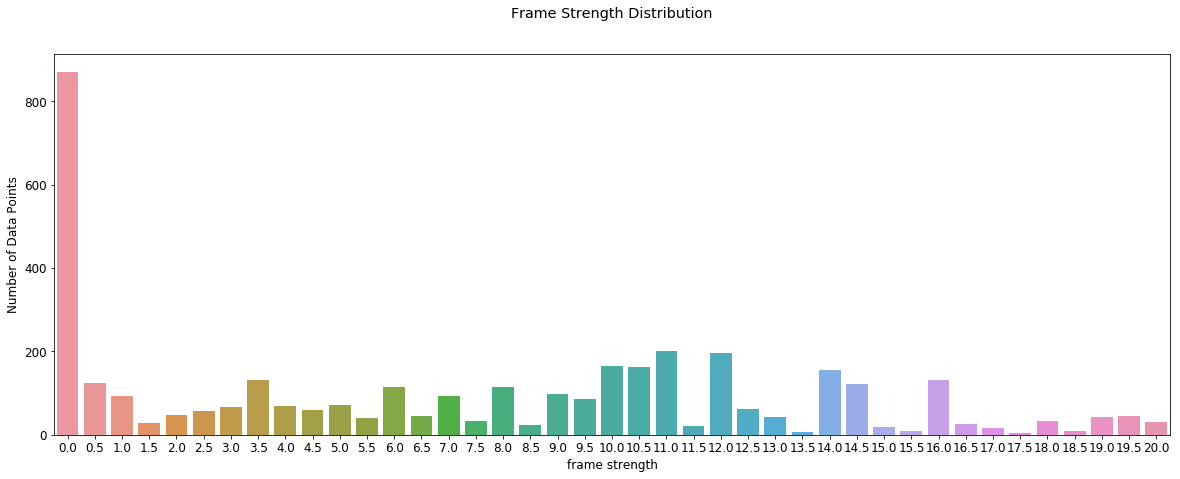

In [22]:
# Bins are 1/2 frames - Centered
bins = pd.IntervalIndex.from_tuples([(-0.25,0.25), (0.25,0.75), (0.75,1.25), (1.25,1.75), (1.75,2.25), (2.25,2.75),
                                     (2.75,3.25), (3.25,3.75), (3.75,4.25), (4.25,4.75), (4.75,5.25), (5.25,5.75),
                                     (5.75,6.25), (6.25,6.75), (6.75,7.25), (7.25,7.75), (7.75,8.25), (8.25,8.75),
                                     (8.75,9.25), (9.25,9.75), (9.75,10.25),(10.25, 10.75),(10.75, 11.25),
                                     (11.25, 11.75),(11.75, 12.25),(12.25, 12.75),(12.75, 13.25),(13.25, 13.75),
                                     (13.75, 14.25),(14.25, 14.75),(14.75, 15.25),(15.25, 15.75),(15.75, 16.25),
                                     (16.25, 16.75),(16.75, 17.25),(17.25, 17.75),(17.75, 18.25),(18.25, 18.75),
                                     (18.75, 19.25),(19.25, 19.75),(19.75, 20.25),(20.25,50.0)])

fs_binned = pd.cut(y, bins)
fs_binned = pd.DataFrame(data=fs_binned)

for i in range(len(bins)):
    fs_binned.loc[fs_binned['frame strength'] == bins[i], 'bin_num'] = i+1

fs_binned['frame strength'] = (fs_binned['bin_num'] - 1)/2

fsbin_grp = fs_binned.groupby('frame strength').count().reset_index()

rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(20,7))
sns.barplot(x='frame strength', y='bin_num', data=fsbin_grp)
plt.title('Frame Strength Distribution', y=1.08);
plt.ylabel('Number of Data Points')

### Create feature importance dictionary

In [23]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

### Creating dataframe to save performance metrics

In [24]:
df_perform_metrics = pd.DataFrame()

### Computing 1/2 frame bins

In [25]:
# Bins are 1/2 frames - Centered
bins = pd.IntervalIndex.from_tuples([(-0.5,0.5), (0.5,1.5), (1.5,2.5), (2.5,3.5), (3.5,4.5), (4.5,5.5),
                                     (5.5,6.5), (6.5,7.5), (7.5,8.5), (8.5,9.5), (9.5,10.5), (10.5,11.5),
                                     (11.5,12.5), (12.5,13.5), (13.5,14.5), (14.5,15.5), (15.5,16.5), (16.5,17.5),
                                     (17.5,18.5), (18.5,19.5), (19.5,20.5), (20.5, 100)])

In [26]:
def compute_metrics(X, y, y_pred):
    """Computing model performance metrics"""
    rsq = r2_score(y, y_pred)
    adj_rsq = 1 - (1-rsq)*(len(y)-1)/(len(y)-X.shape[1]-1)
    mae = mean_absolute_error(y, y_pred)
    rmse = sqrt(mean_squared_error(y, y_pred))
    print(round(rsq, 3), round(adj_rsq, 3), round(mae, 3), round(rmse, 3))
    return rsq, adj_rsq, mae, rmse

In [27]:
def build_error_analysis_df(df, y, y_pred):
    """Computing frame error for model prediction for analysis"""
    df_err = df.copy()
    df_err['y_actual'] = y
    df_err['y_pred'] = y_pred
    df_err['frame_diff'] = df_err['y_actual'] - df_err['y_pred']
    df_err['abs_frame_diff'] = abs(df_err['frame_diff'])
    
    return df_err

In [28]:
def compute_frame_acc(df_err, metrics, acc_metric_names, frame_diff_name):
    '''Computing how many % of Within Frame Errors 
       Input: df_err:           Data Frame with Frame Error
              metrics:          dictionary to store metrics
              acc_metric_names: list with names for accuracy metrics
              frame_diff_name:  name of column containing frame difference error
       Output: dictionary containing computed accuracy metrics'''
    metrics[acc_metric_names[0]] = (len(df_err[df_err[frame_diff_name] < 1.5]) / 
                                    len(df_err[frame_diff_name]) * 100)
    metrics[acc_metric_names[1]] = (len(df_err[df_err[frame_diff_name] < 2.5]) / 
                                    len(df_err[frame_diff_name]) * 100)
    metrics[acc_metric_names[2]] = (len(df_err[df_err[frame_diff_name] < 3.5]) / 
                                    len(df_err[frame_diff_name]) * 100)      
    metrics[acc_metric_names[3]] = (len(df_err[df_err[frame_diff_name] < 4.5]) / 
                                    len(df_err[frame_diff_name]) * 100)    
    metrics[acc_metric_names[4]] = (len(df_err[df_err[frame_diff_name] < 5.5]) / 
                                    len(df_err[frame_diff_name]) * 100)    

    return metrics

In [29]:
def compute_mean_metrics(metrics, perform_metrics_list, df_err, acc_metric_names, frame_diff_name, unbinned=True):
    """Computing mean performance metrics, and accuracy"""  
    # Only compute for unbinned data, when binned=False
    if unbinned:
        # Flatten list of metrics
        perform_metrics_list = [item for sublist in perform_metrics_list for item in sublist]

        metrics['mean_rsq'] = np.mean(perform_metrics_list[0::4])
        metrics['mean_adjrsq'] = np.mean(perform_metrics_list[1::4])
        metrics['mean_mae'] = np.mean(perform_metrics_list[2::4])
        metrics['mean_rmse'] = np.mean(perform_metrics_list[3::4])

        # Mean difference for incorrect predictions
        diff = df_err['y_actual'] - df_err['y_pred']
        metrics['mean_frame_diff'] = np.mean(abs(diff[diff >= 0.5]))
        metrics['median_frame_diff'] = np.median(abs(diff[diff >= 0.5]))

    # Computing how many % of Within Frame Errors    
    metrics = compute_frame_acc(df_err, metrics, acc_metric_names, frame_diff_name)
    
    return metrics

In [30]:
def report_metrics(metrics, perform_metrics_list, df_err, acc_metric_names, frame_diff_name, 
                   unbinned=True):
    # Computing performance metrics
    metrics = compute_mean_metrics(metrics, perform_metrics_list, df_err, acc_metric_names, frame_diff_name, 
                                   unbinned)

    if unbinned:
        # Reporting perfomance metrics
        print(f"\nMean R-squared for 10 Iterations          : {metrics['mean_rsq']:1.5}")
        print(f"Mean Adjusted R-squared for 10 Iterations : {metrics['mean_adjrsq']:1.5}")
        print(f"Mean MAE for 10 Iterations                : {metrics['mean_mae']:1.5} frames")
        print(f"Mean RMSE for 10 Iterations               : {metrics['mean_rmse']:1.5} frames")
        print()
        print(f"Mean difference for Incorrect Predictions:   {metrics['mean_frame_diff']:2.2} frames")
        print(f"Median difference for Incorrect Predictions: {metrics['median_frame_diff']:2.2} frames")
    print()
    print(f"% Predictions Within 1 Frame         : {metrics[acc_metric_names[0]]:3.2f}%")
    print(f"% Predictions Within 2 Frames        : {metrics[acc_metric_names[1]]:3.2f}%")
    print(f"% Predictions Within 3 Frames        : {metrics[acc_metric_names[2]]:3.2f}%")
    print(f"% Predictions Within 4 Frames        : {metrics[acc_metric_names[3]]:3.2f}%")
    print(f"% Predictions Within 5 Frames        : {metrics[acc_metric_names[4]]:3.2f}%") 
              
    return metrics

In [31]:
def plot_hist(df):
    print(f"\nMin Diff: {df['frame_diff'].min()}, Max Diff: {df['frame_diff'].max()}")
    (df['frame_diff']).hist(bins=(50), color='gold');
    plt.xlabel("Frames")
    plt.ylabel("Number of Pics")
    plt.title("Histogram of Frame Count Error", y=1.04);
    plt.xlim(-30,30);
    plt.grid(False)
    plt.show()

In [32]:
def compute_bins(df, metrics):
    # Computing binned actual frame count
    fs_binned_actual = pd.cut(df['y_actual'], bins)
    fs_binned_actual = pd.DataFrame(data=fs_binned_actual)

    for i in range(len(bins)):
        fs_binned_actual.loc[fs_binned_actual['y_actual'] == bins[i], 'bin_num'] = i

    # Computing binned predicted frame count
    fs_binned_pred = pd.cut(df['y_pred'], bins)
    fs_binned_pred = pd.DataFrame(data=fs_binned_pred)

    for i in range(len(bins)):
        fs_binned_pred.loc[fs_binned_pred['y_pred'] == bins[i], 'bin_num'] = i

    # Adding binned frame count to dataframe
    df['y_actual_binned'] = fs_binned_actual['bin_num']
    df['y_pred_binned'] = fs_binned_pred['bin_num']

    # Computing difference & absolute binned frame error
    df['binned_frame_diff'] = df['y_actual_binned'] - df['y_pred_binned']
    df['abs_binned_frame_diff'] = abs(df['binned_frame_diff'])
    
    return df, metrics

### Linear Regression

#### Grid Search

In [33]:
# from sklearn.linear_model import LinearRegression

# stdscl = StandardScaler()
# X_train_std = stdscl.fit_transform(X_train[features])

# linreg = LinearRegression()
# param_grid = {'fit_intercept': [True, False]}

# n_jobs = 4 
# regressor = GridSearchCV(estimator=linreg, cv=None, param_grid=param_grid, n_jobs=n_jobs)
# best_est = regressor.fit(X_train_std, y_train)
# print(regressor.best_estimator_)

# print("Best Estimator Parameters")
# print("---------------------------")
# print(f"fit_intercept: {regressor.best_params_['fit_intercept']}")
# print 
# print(f"Train R-squared: {regressor.score(X_train_std, y_train)}")

In [33]:
params = {'copy_X': True, 
          'fit_intercept': True, 
          'n_jobs': None,
          'normalize': False}

In [34]:
# Create experiment to track
neptune.create_experiment(name="2019-06-23_Filt_KFoldsCV_LinearRegression", 
                          params=params)

VER-24
https://ui.neptune.ml/gretchenriggs/Verifli/e/VER-24


Experiment(VER-24)

In [35]:
# Saving version of data to Neptune
data_version = sha1(np.ascontiguousarray(pd.DataFrame.to_numpy(X))).hexdigest()
neptune.send_text('data_version', data_version)

# Send number of data points used in Model Building to Neptue
neptune.send_metric('num_data_pts', len(X))

#### K-fold Cross-validation on test set

rsq  adj-rsq  mae  rmse
0.649 0.482 2.834 3.464
0.537 0.316 3.179 3.915
0.601 0.411 2.859 3.649
0.653 0.488 2.653 3.327
0.571 0.366 3.163 3.982
0.694 0.548 2.551 3.168
0.627 0.449 2.907 3.612
0.604 0.415 2.903 3.647
0.616 0.433 2.775 3.576
0.628 0.45 3.032 3.745

Mean R-squared for 10 Iterations          : 0.61821
Mean Adjusted R-squared for 10 Iterations : 0.43569
Mean MAE for 10 Iterations                : 2.8856 frames
Mean RMSE for 10 Iterations               : 3.6084 frames

Mean difference for Incorrect Predictions:   3.1 frames
Median difference for Incorrect Predictions: 2.7 frames

% Predictions Within 1 Frame         : 30.74%
% Predictions Within 2 Frames        : 50.91%
% Predictions Within 3 Frames        : 66.57%
% Predictions Within 4 Frames        : 79.83%
% Predictions Within 5 Frames        : 88.33%

Min Diff: -14.04441356503623, Max Diff: 20.652978326765066


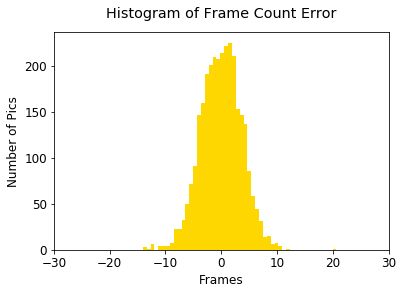


% Predictions Within 1 Frame         : 27.25%
% Predictions Within 2 Frames        : 45.36%
% Predictions Within 3 Frames        : 61.05%
% Predictions Within 4 Frames        : 74.81%
% Predictions Within 5 Frames        : 83.02%


In [36]:
from sklearn.linear_model import LinearRegression

X_test_pred_all_lr = pd.DataFrame()
perform_metrics_list = []
kfold = KFold(10, True, 1)

print("rsq  adj-rsq  mae  rmse")

for train_index, test_index in kfold.split(X_train): 
    stdscl = StandardScaler()
    X_train1_std = stdscl.fit_transform(X_train.iloc[train_index][features])
    X_cv_std = stdscl.transform(X_train.iloc[test_index][features])
    y_train1 = y_train.iloc[train_index]
    y_cv = y_train.iloc[test_index]

    lr = LinearRegression(**params)
    lr_model = lr.fit(X_train1_std, y_train1)
    lr_predict = lr.predict(X_cv_std)
    perform_metrics = compute_metrics(X_cv_std, y_cv, lr_predict)
    perform_metrics_list.append(perform_metrics)

    # Creating Dataframe with differences of predicted vs actual for plotting
    X_test_pred = build_error_analysis_df(X_train.iloc[test_index], y_train.iloc[test_index], lr_predict)
    X_test_pred_all_lr = X_test_pred_all_lr.append(X_test_pred)    

metrics = {}
# Computing Performance Metrics
acc_metric_names = ['acc_within1frames', 'acc_within2frames', 'acc_within3frames', 'acc_within4frames',
                    'acc_within5frames']
frame_diff_name = 'abs_frame_diff'
metrics = report_metrics(metrics, perform_metrics_list, X_test_pred_all_lr, acc_metric_names,
                         frame_diff_name)

plot_hist(X_test_pred_all_lr)
X_test_pred_all_lr, metrics = compute_bins(X_test_pred_all_lr, metrics)

# Computinng Binned Accuracy Meterics
acc_metric_names = ['acc_binned_within1frames', 'acc_binned_within2frames', 'acc_binned_within3frames',
                    'acc_binned_within4frames', 'acc_binned_within5frames']
frame_diff_name = 'abs_binned_frame_diff'
metrics = report_metrics(metrics, perform_metrics_list, X_test_pred_all_lr, acc_metric_names,
                         frame_diff_name, unbinned=False)
df_perform_metrics = df_perform_metrics.append([metrics])

ranks["LinReg"] = ranking(np.abs(lr.coef_), features)

### Saving metrics to Neptune-ML

In [37]:
neptune.append_tag("Linear Regression")

for key, val in metrics.items():
    neptune.send_metric(key, val)

In [38]:
neptune.stop()

### Ridge Regression

#### Grid Search

In [40]:
# from sklearn.linear_model import Ridge

# # For hyperparameter selection
# stdscl = StandardScaler()
# X_train_std = stdscl.fit_transform(X_train[features])

# rid = Ridge()
# param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01],
#               'max_iter': [100, 1000],
#               'tol': [0.0001, 0.001, 0.01],
#               'solver': ['svd', 'lsqr', 'sparse_cg', 'sag', 'saga']}

# n_jobs = 4 
# regressor = GridSearchCV(estimator=rid, cv=None, param_grid=param_grid, n_jobs=n_jobs)
# best_est = regressor.fit(X_train_std, y_train)
# print(regressor.best_estimator_)

# print("Best Estimator Parameters")
# print("---------------------------")
# print(f"alpha: {regressor.best_params_['alpha']}")
# print(f"max_iter: {regressor.best_params_['max_iter']}")
# print(f"tol: {regressor.best_params_['tol']}")
# print(f"solver: {regressor.best_params_['solver']}")
# print 
# print(f"Train R-squared: {regressor.score(X_train_std, y_train)}")

#### K-fold Cross-validation on test set

In [39]:
params= {'alpha':0.0001, 
         'copy_X':True, 
         'fit_intercept':True, 
         'max_iter':100,
         'normalize':False, 
         'random_state':None, 
         'solver':'sag', 
         'tol':0.01}

In [40]:
# Create experiment to track
neptune.create_experiment(name="2019-06-23_Filt_KFoldsCV_RidgeRegression", 
                          params=params)

VER-25
https://ui.neptune.ml/gretchenriggs/Verifli/e/VER-25


Experiment(VER-25)

In [ ]:
# Saving version of data to Neptune
data_version = sha1(np.ascontiguousarray(pd.DataFrame.to_numpy(X))).hexdigest()
neptune.send_text('data_version', data_version)

# Send number of data points used in Model Building to Neptue
neptune.send_metric('num_data_pts', len(X))

rsq  adj-rsq  mae  rmse
0.649 0.482 2.834 3.464
0.537 0.316 3.179 3.915
0.601 0.411 2.859 3.649
0.653 0.488 2.653 3.327
0.571 0.366 3.163 3.982
0.694 0.548 2.551 3.168
0.627 0.449 2.907 3.612
0.604 0.415 2.903 3.647
0.616 0.433 2.775 3.576
0.628 0.45 3.032 3.745

Mean R-squared for 10 Iterations          : 0.61821
Mean Adjusted R-squared for 10 Iterations : 0.43569
Mean MAE for 10 Iterations                : 2.8856 frames
Mean RMSE for 10 Iterations               : 3.6084 frames

Mean difference for Incorrect Predictions:   3.1 frames
Median difference for Incorrect Predictions: 2.7 frames

% Predictions Within 1 Frame         : 30.74%
% Predictions Within 2 Frames        : 50.91%
% Predictions Within 3 Frames        : 66.57%
% Predictions Within 4 Frames        : 79.83%
% Predictions Within 5 Frames        : 88.33%

Min Diff: -14.04441356503623, Max Diff: 20.652978326765066


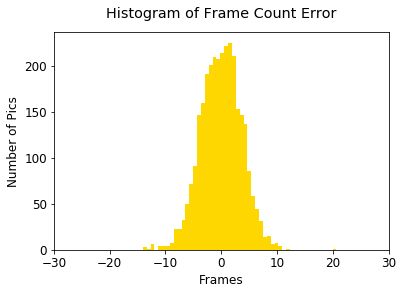


% Predictions Within 1 Frame         : 27.25%
% Predictions Within 2 Frames        : 45.36%
% Predictions Within 3 Frames        : 61.05%
% Predictions Within 4 Frames        : 74.81%
% Predictions Within 5 Frames        : 83.02%


In [41]:
from sklearn.linear_model import Ridge

X_test_pred_all_rid = pd.DataFrame()
perform_metrics_list = []
kfold = KFold(10, True, 1)

print("rsq  adj-rsq  mae  rmse")

for train_index, test_index in kfold.split(X_train): 
    stdscl = StandardScaler()
    X_train1_std = stdscl.fit_transform(X_train.iloc[train_index][features])
    X_cv_std = stdscl.transform(X_train.iloc[test_index][features])
    y_train1 = y_train.iloc[train_index]
    y_cv = y_train.iloc[test_index]

    rid = Ridge(**params)
    rid_model = lr.fit(X_train1_std, y_train1)
    rid_predict = lr.predict(X_cv_std)
    perform_metrics = compute_metrics(X_cv_std, y_cv, rid_predict)
    perform_metrics_list.append(perform_metrics)

    # Creating Dataframe with differences of predicted vs actual for plotting
    X_test_pred = build_error_analysis_df(X_train.iloc[test_index], y_train.iloc[test_index], rid_predict)
    X_test_pred_all_rid = X_test_pred_all_rid.append(X_test_pred)    

metrics = {}
# Computing Performance Metrics
acc_metric_names = ['acc_within1frames', 'acc_within2frames', 'acc_within3frames', 'acc_within4frames',
                    'acc_within5frames']
frame_diff_name = 'abs_frame_diff'
metrics = report_metrics(metrics, perform_metrics_list, X_test_pred_all_rid, acc_metric_names,
                         frame_diff_name)

plot_hist(X_test_pred_all_rid)
X_test_pred_all_rid, metrics = compute_bins(X_test_pred_all_rid, metrics)

# Computinng Binned Accuracy Meterics
acc_metric_names = ['acc_binned_within1frames', 'acc_binned_within2frames', 'acc_binned_within3frames',
                    'acc_binned_within4frames', 'acc_binned_within5frames']
frame_diff_name = 'abs_binned_frame_diff'
metrics = report_metrics(metrics, perform_metrics_list, X_test_pred_all_rid, acc_metric_names,
                         frame_diff_name, unbinned=False)
df_perform_metrics = df_perform_metrics.append([metrics])

# ranks["Ridge"] = ranking(np.abs(rid.coef_), features)

### Saving metrics to Neptune-ML

In [42]:
neptune.append_tag("Ridge Regression")

for key, val in metrics.items():
    neptune.send_metric(key, val)

In [43]:
neptune.stop()

### Lasso Regression

#### Grid Search

In [49]:
# from sklearn.linear_model import Lasso


# # For hyperparameter selection
# stdscl = StandardScaler()
# X_train_std = stdscl.fit_transform(X_train[features])

# las = Lasso()
# param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01],
#               'max_iter': [100, 1000],
#               'tol': [0.0001, 0.001, 0.01]}

# n_jobs = 4 
# regressor = GridSearchCV(estimator=las, cv=None, param_grid=param_grid, n_jobs=n_jobs)
# best_est = regressor.fit(X_train_std, y_train)
# print(regressor.best_estimator_)

# print("Best Estimator Parameters")
# print("---------------------------")
# print(f"alpha: {regressor.best_params_['alpha']}")
# print(f"max_iter: {regressor.best_params_['max_iter']}")
# print(f"tol: {regressor.best_params_['tol']}")
# print 
# print(f"Train R-squared: {regressor.score(X_train_std, y_train)}")

In [44]:
params = {'alpha':0.01, 
          'copy_X':True, 
          'fit_intercept':True, 
          'max_iter':1000,
          'normalize':False, 
          'positive':False, 
          'precompute':False, 
          'random_state':None,
          'selection':'cyclic', 
          'tol':0.01, 
          'warm_start':False}

In [45]:
# Create experiment to track
neptune.create_experiment(name="2019-06-23_Filt_KFoldsCV_LassoRegression", 
                          params=params)

VER-26
https://ui.neptune.ml/gretchenriggs/Verifli/e/VER-26


Experiment(VER-26)

In [46]:
# Saving version of data to Neptune
data_version = sha1(np.ascontiguousarray(pd.DataFrame.to_numpy(X))).hexdigest()
neptune.send_text('data_version', data_version)

# Send number of data points used in Model Building to Neptue
neptune.send_metric('num_data_pts', len(X))

#### K-fold Cross-validation on test set

rsq  adj-rsq  mae  rmse
0.612 0.426 3.03 3.644
0.497 0.257 3.373 4.08
0.525 0.298 3.202 3.984
0.572 0.368 2.962 3.697
0.541 0.321 3.42 4.121
0.65 0.483 2.724 3.386
0.581 0.381 3.139 3.83
0.57 0.364 3.102 3.801
0.575 0.371 2.999 3.766
0.542 0.323 3.473 4.154

Mean R-squared for 10 Iterations          : 0.5665
Mean Adjusted R-squared for 10 Iterations : 0.35925
Mean MAE for 10 Iterations                : 3.1423 frames
Mean RMSE for 10 Iterations               : 3.8462 frames

Mean difference for Incorrect Predictions:   3.3 frames
Median difference for Incorrect Predictions: 3.0 frames

% Predictions Within 1 Frame         : 28.61%
% Predictions Within 2 Frames        : 43.97%
% Predictions Within 3 Frames        : 59.12%
% Predictions Within 4 Frames        : 74.61%
% Predictions Within 5 Frames        : 86.11%

Min Diff: -15.426271142389105, Max Diff: 11.919411999423604


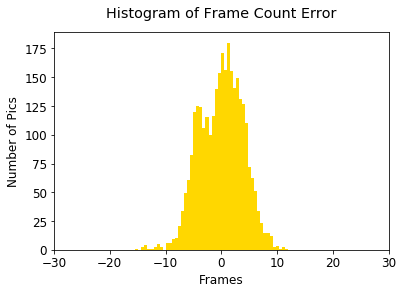


% Predictions Within 1 Frame         : 25.59%
% Predictions Within 2 Frames        : 39.51%
% Predictions Within 3 Frames        : 54.24%
% Predictions Within 4 Frames        : 68.86%
% Predictions Within 5 Frames        : 80.43%


In [47]:
from sklearn.linear_model import Lasso

X_test_pred_all_las = pd.DataFrame()
perform_metrics_list = []
kfold = KFold(10, True, 1)

print("rsq  adj-rsq  mae  rmse")

for train_index, test_index in kfold.split(X_train): 
    stdscl = StandardScaler()
    X_train1_std = stdscl.fit_transform(X_train.iloc[train_index][features])
    X_cv_std = stdscl.transform(X_train.iloc[test_index][features])
    y_train1 = y_train.iloc[train_index]
    y_cv = y_train.iloc[test_index]

    las = Lasso(**params)
    las_model = las.fit(X_train1_std, y_train1)
    las_predict = las.predict(X_cv_std)
    perform_metrics = compute_metrics(X_cv_std, y_cv, las_predict)
    perform_metrics_list.append(perform_metrics)

    # Creating Dataframe with differences of predicted vs actual for plotting
    X_test_pred = build_error_analysis_df(X_train.iloc[test_index], y_train.iloc[test_index], las_predict)
    X_test_pred_all_las = X_test_pred_all_las.append(X_test_pred)    

metrics = {}
# Computing Performance Metrics
acc_metric_names = ['acc_within1frames', 'acc_within2frames', 'acc_within3frames', 'acc_within4frames',
                    'acc_within5frames']
frame_diff_name = 'abs_frame_diff'
metrics = report_metrics(metrics, perform_metrics_list, X_test_pred_all_las, acc_metric_names,
                         frame_diff_name)

plot_hist(X_test_pred_all_las)
X_test_pred_all_las, metrics = compute_bins(X_test_pred_all_las, metrics)

# Computinng Binned Accuracy Meterics
acc_metric_names = ['acc_binned_within1frames', 'acc_binned_within2frames', 'acc_binned_within3frames',
                    'acc_binned_within4frames', 'acc_binned_within5frames']
frame_diff_name = 'abs_binned_frame_diff'
metrics = report_metrics(metrics, perform_metrics_list, X_test_pred_all_las, acc_metric_names,
                         frame_diff_name, unbinned=False)

df_perform_metrics = df_perform_metrics.append([metrics])

ranks["Lasso"] = ranking(np.abs(las.coef_), features)

### Saving metrics to Neptune-ML

In [48]:
neptune.append_tag("Lasso Regression")

for key, val in metrics.items():
    neptune.send_metric(key, val)

In [49]:
neptune.stop()

### Decision Tree Regressor

#### Grid Search

In [56]:
# from sklearn.tree import DecisionTreeRegressor

# # For hyperparameter selection
# dtr = DecisionTreeRegressor()
# param_grid = {'splitter': ['best', 'random'],
#               'max_depth': [3, 5, 7, 9],
#               'min_samples_split': [2, 3, 5],
#               'min_samples_leaf': [1, 5, 10, 15],
#               'max_features' : ['auto', 'sqrt']}

# n_jobs = 4 
# regressor = GridSearchCV(estimator=dtr, cv=None, param_grid=param_grid, n_jobs=n_jobs)
# best_est = regressor.fit(X_train[features], y_train)
# print(regressor.best_estimator_)

# print("Best Estimator Parameters")
# print("---------------------------")
# print(f"splitter: {regressor.best_params_['splitter']}")
# print(f"max_depth: {regressor.best_params_['max_depth']}")
# print(f"min_samples_split: {regressor.best_params_['min_samples_split']}")
# print(f"min_samples_leaf: {regressor.best_params_['min_samples_leaf']}")
# print(f"max_features: {regressor.best_params_['max_features']}")
# print 
# print(f"R-squared: {regressor.score(X_train[features], y_train)}")

In [50]:
params= {'criterion':'mse', 
         'max_depth':7, 
         'max_features':'auto',
         'max_leaf_nodes':None, 
         'min_impurity_decrease':0.0,
         'min_impurity_split':None, 
         'min_samples_leaf':5,
         'min_samples_split':2, 
         'min_weight_fraction_leaf':0.0,
         'presort':False, 
         'random_state':None, 
         'splitter':'best'}

In [51]:
# Create experiment to track
neptune.create_experiment(name="2019-06-23_Filt_KFoldsCV_DecisionTreeRegressor", 
                          params=params)

VER-27
https://ui.neptune.ml/gretchenriggs/Verifli/e/VER-27


Experiment(VER-27)

In [52]:
# Saving version of data to Neptune
data_version = sha1(np.ascontiguousarray(pd.DataFrame.to_numpy(X))).hexdigest()
neptune.send_text('data_version', data_version)

# Send number of data points used in Model Building to Neptue
neptune.send_metric('num_data_pts', len(X))

#### K-fold Cross-validation on test set

rsq  adj-rsq  mae  rmse
0.772 0.664 1.702 2.79
0.703 0.562 2.051 3.135
0.793 0.694 1.63 2.631
0.749 0.629 1.756 2.833
0.786 0.684 1.61 2.811
0.735 0.608 1.764 2.948
0.779 0.673 1.639 2.782
0.766 0.655 1.687 2.8
0.799 0.703 1.529 2.59
0.771 0.66 1.861 2.941

Mean R-squared for 10 Iterations          : 0.76531
Mean Adjusted R-squared for 10 Iterations : 0.65311
Mean MAE for 10 Iterations                : 1.7229 frames
Mean RMSE for 10 Iterations               : 2.8262 frames

Mean difference for Incorrect Predictions:   2.9 frames
Median difference for Incorrect Predictions: 2.2 frames

% Predictions Within 1 Frame         : 62.08%
% Predictions Within 2 Frames        : 75.17%
% Predictions Within 3 Frames        : 82.52%
% Predictions Within 4 Frames        : 87.90%
% Predictions Within 5 Frames        : 92.36%

Min Diff: -13.591818181818178, Max Diff: 15.068571428571428


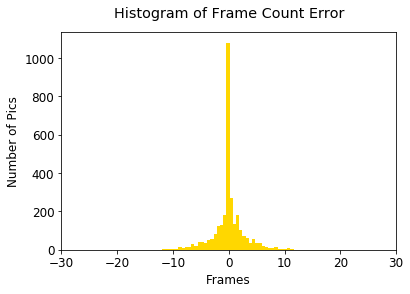


% Predictions Within 1 Frame         : 60.68%
% Predictions Within 2 Frames        : 74.58%
% Predictions Within 3 Frames        : 81.89%
% Predictions Within 4 Frames        : 87.50%
% Predictions Within 5 Frames        : 92.12%


In [53]:
from sklearn.tree import DecisionTreeRegressor

X_test_pred_all_dtree = pd.DataFrame()
perform_metrics_list = []
kfold = KFold(10, True, 1)

print("rsq  adj-rsq  mae  rmse")

for train_index, test_index in kfold.split(X_train): 
    X_train1 = X_train.iloc[train_index][features]
    X_cv = X_train.iloc[test_index][features]
    y_train1 = y_train.iloc[train_index]
    y_cv = y_train.iloc[test_index]

    dtree = DecisionTreeRegressor(**params)
    dtree_model = dtree.fit(X_train1, y_train1)
    dtree_predict = dtree.predict(X_cv)
    perform_metrics = compute_metrics(X_cv, y_cv, dtree_predict)
    perform_metrics_list.append(perform_metrics)

    # Creating Dataframe with differences of predicted vs actual for plotting
    X_test_pred = build_error_analysis_df(X_train.iloc[test_index], y_train.iloc[test_index], dtree_predict)
    X_test_pred_all_dtree = X_test_pred_all_dtree.append(X_test_pred)    

metrics = {}
# Computing Performance Metrics
acc_metric_names = ['acc_within1frames', 'acc_within2frames', 'acc_within3frames', 'acc_within4frames',
                    'acc_within5frames']
frame_diff_name = 'abs_frame_diff'
metrics = report_metrics(metrics, perform_metrics_list, X_test_pred_all_dtree, acc_metric_names,
                         frame_diff_name)

plot_hist(X_test_pred_all_dtree)
X_test_pred_all_dtree, metrics = compute_bins(X_test_pred_all_dtree, metrics)

# Computinng Binned Accuracy Meterics
acc_metric_names = ['acc_binned_within1frames', 'acc_binned_within2frames', 'acc_binned_within3frames',
                    'acc_binned_within4frames', 'acc_binned_within5frames']
frame_diff_name = 'abs_binned_frame_diff'
metrics = report_metrics(metrics, perform_metrics_list, X_test_pred_all_dtree, acc_metric_names,
                         frame_diff_name, unbinned=False)

df_perform_metrics = df_perform_metrics.append([metrics])

ranks["DTree"] = ranking(dtree.feature_importances_, features);

### Saving metrics to Neptune-ML

In [54]:
neptune.append_tag("Decision Tree Regressor")

for key, val in metrics.items():
    neptune.send_metric(key, val)

In [55]:
neptune.stop()

### Support Vector Regressor

#### Grid Search

In [63]:
# from sklearn.svm import SVR

# # For hyperparameter selection
# stdscl = StandardScaler()
# X_train1, X_cv, y_train1, y_cv = train_test_split(X_train[features], y_train, test_size=0.2)
# X_train1_std = stdscl.fit_transform(X_train1)
# X_cv_std = stdscl.transform(X_cv)

# svr = SVR()
# param_grid = {'C' : [0.1, 1.0, 10.0],
#               'epsilon' : [0.01, 0.03, 0.05, 0.07, 0.10],
#               'tol' : [0.01, 0.001, 0.005, 0.0001]}

# n_jobs = 4 
# regressor = GridSearchCV(estimator=svr, cv=None, param_grid=param_grid, n_jobs=n_jobs)
# best_est = regressor.fit(X_train1_std, y_train1)
# print(regressor.best_estimator_)

# print("Best Estimator Parameters")
# print("---------------------------")
# print(f"C: {regressor.best_params_['C']}")
# print(f"epsilon: {regressor.best_params_['epsilon']}")
# print(f"tol: {regressor.best_params_['tol']}")
# print 
# print(f"Train R-squared: {regressor.score(X_cv_std, y_cv)}")

In [33]:
params= {'C':10.0, 
         'cache_size':200, 
         'coef0':0.0, 
         'degree':3, 
         'epsilon':0.1,
         'gamma':'auto_deprecated', 
         'kernel':'rbf', 
         'max_iter':-1, 
         'shrinking':True,
         'tol':0.005, 
         'verbose':False}

In [34]:
# Create experiment to track
neptune.create_experiment(name="2019-06-23_Filt_KFoldsCV_SupportVectorRegressor", 
                          params=params)

VER-28
https://ui.neptune.ml/gretchenriggs/Verifli/e/VER-28


Experiment(VER-28)

In [35]:
# Saving version of data to Neptune
data_version = sha1(np.ascontiguousarray(pd.DataFrame.to_numpy(X))).hexdigest()
neptune.send_text('data_version', data_version)

# Send number of data points used in Model Building to Neptue
neptune.send_metric('num_data_pts', len(X))

#### K-fold Cross-validation on test set

rsq  adj-rsq  mae  rmse
0.818 0.732 1.606 2.49
0.808 0.716 1.708 2.554
0.747 0.625 1.955 2.827
0.8 0.705 1.761 2.641
0.834 0.755 1.535 2.31
0.815 0.726 1.799 2.647
0.8 0.704 1.774 2.625
0.809 0.718 1.785 2.53
0.735 0.609 1.956 2.913
0.792 0.692 1.785 2.614

Mean R-squared for 10 Iterations          : 0.79581
Mean Adjusted R-squared for 10 Iterations : 0.69818
Mean MAE for 10 Iterations                : 1.7666 frames
Mean RMSE for 10 Iterations               : 2.6151 frames

Mean difference for Incorrect Predictions:   2.4 frames
Median difference for Incorrect Predictions: 1.8 frames

% Predictions Within 1 Frame         : 59.39%
% Predictions Within 2 Frames        : 74.64%
% Predictions Within 3 Frames        : 84.51%
% Predictions Within 4 Frames        : 90.03%
% Predictions Within 5 Frames        : 94.02%

Min Diff: -11.839929103523703, Max Diff: 10.412689169691546


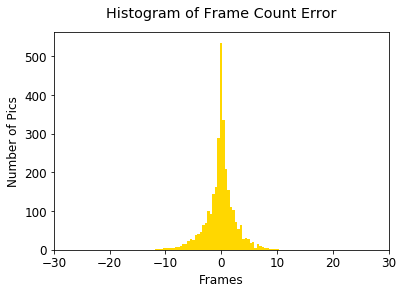


% Predictions Within 1 Frame         : 55.70%
% Predictions Within 2 Frames        : 71.65%
% Predictions Within 3 Frames        : 81.12%
% Predictions Within 4 Frames        : 86.77%
% Predictions Within 5 Frames        : 91.09%


In [36]:
from sklearn.svm import SVR

X_test_pred_all_svr = pd.DataFrame()
perform_metrics_list = []
kfold = KFold(10, True, 1)

print("rsq  adj-rsq  mae  rmse")

for train_index, test_index in kfold.split(X_train): 
    stdscl = StandardScaler()
    X_train1_std = stdscl.fit_transform(X_train.iloc[train_index][features])
    X_cv_std = stdscl.transform(X_train.iloc[test_index][features])
    y_train1 = y_train.iloc[train_index]
    y_cv = y_train.iloc[test_index]

    svr = SVR(**params)
    svr_model = svr.fit(X_train1_std, y_train1)
    svr_predict = svr.predict(X_cv_std)
    perform_metrics = compute_metrics(X_cv_std, y_cv, svr_predict)
    perform_metrics_list.append(perform_metrics)

    # Creating Dataframe with differences of predicted vs actual for plotting
    X_test_pred = build_error_analysis_df(X_train.iloc[test_index], y_train.iloc[test_index], svr_predict)
    X_test_pred_all_svr = X_test_pred_all_svr.append(X_test_pred)    

metrics = {}
# Computing Performance Metrics
acc_metric_names = ['acc_within1frames', 'acc_within2frames', 'acc_within3frames', 'acc_within4frames',
                    'acc_within5frames']
frame_diff_name = 'abs_frame_diff'
metrics = report_metrics(metrics, perform_metrics_list, X_test_pred_all_svr, acc_metric_names,
                         frame_diff_name)

plot_hist(X_test_pred_all_svr)
X_test_pred_all_svr, metrics = compute_bins(X_test_pred_all_svr, metrics)

# Computinng Binned Accuracy Meterics
acc_metric_names = ['acc_binned_within1frames', 'acc_binned_within2frames', 'acc_binned_within3frames',
                    'acc_binned_within4frames', 'acc_binned_within5frames']
frame_diff_name = 'abs_binned_frame_diff'
metrics = report_metrics(metrics, perform_metrics_list, X_test_pred_all_svr, acc_metric_names,
                         frame_diff_name, unbinned=False)

df_perform_metrics = df_perform_metrics.append([metrics]) 

### Saving metrics to Neptune-ML

In [37]:
neptune.append_tag("Support_Vector_Regressor")

for key, val in metrics.items():
    neptune.send_metric(key, val)

In [38]:
neptune.stop()

### Random Forest Regressor

#### Grid Search

In [70]:
# from sklearn.ensemble import RandomForestRegressor

# # For hyperparameter selection
# rfr = RandomForestRegressor()
# param_grid = {'n_estimators': [100, 200, 400],
#               'max_features': ['auto', 'sqrt'],
#               'min_samples_split': [2, 3, 4, 5],
#               'min_samples_leaf': [1, 3, 5]}              
# n_jobs = 4 
# regressor = GridSearchCV(estimator=rfr, cv=None, param_grid=param_grid, n_jobs=n_jobs)
# best_est = regressor.fit(X_train[features], y_train)
# print(regressor.best_estimator_)

# print("Best Estimator Parameters")
# print("---------------------------")
# print(f"n_estimators: {regressor.best_params_['n_estimators']}")
# print(f"max_features: {regressor.best_params_['max_features']}")
# print(f"min_samples_split: {regressor.best_params_['min_samples_split']}")
# print(f"min_samples_leaf: {regressor.best_params_['min_samples_leaf']}")
# print 
# print(f"R-squared: {regressor.score(X_train[features], y_train)}")

In [39]:
params= {'bootstrap':True, 
         'criterion':'mse', 
         'max_depth':None,
         'max_features':'sqrt', 
         'max_leaf_nodes':None,
         'min_impurity_decrease':0.0, 
         'min_impurity_split':None,
         'min_samples_leaf':1, 
         'min_samples_split':4,
         'min_weight_fraction_leaf':0.0, 
         'n_estimators':400, 
         'n_jobs':None,
         'oob_score':False, 
         'random_state':None, 
         'verbose':0, 
         'warm_start':False}

In [40]:
# Create experiment to track
neptune.create_experiment(name="2019-06-23_Filt_KFoldsCV_RandomForestRegressor", 
                          params=params)

VER-29
https://ui.neptune.ml/gretchenriggs/Verifli/e/VER-29


Experiment(VER-29)

In [41]:
# Saving version of data to Neptune
data_version = sha1(np.ascontiguousarray(pd.DataFrame.to_numpy(X))).hexdigest()
neptune.send_text('data_version', data_version)

# Send number of data points used in Model Building to Neptue
neptune.send_metric('num_data_pts', len(X))

#### K-fold Cross-validation on test set

rsq  adj-rsq  mae  rmse
0.893 0.842 1.181 1.909
0.846 0.772 1.382 2.291
0.785 0.682 1.674 2.606
0.853 0.783 1.359 2.265
0.865 0.801 1.253 2.085
0.859 0.791 1.41 2.311
0.839 0.761 1.454 2.356
0.853 0.782 1.363 2.222
0.819 0.732 1.446 2.409
0.854 0.784 1.272 2.188

Mean R-squared for 10 Iterations          : 0.84646
Mean Adjusted R-squared for 10 Iterations : 0.77305
Mean MAE for 10 Iterations                : 1.3792 frames
Mean RMSE for 10 Iterations               : 2.2644 frames

Mean difference for Incorrect Predictions:   2.4 frames
Median difference for Incorrect Predictions: 1.8 frames

% Predictions Within 1 Frame         : 68.69%
% Predictions Within 2 Frames        : 80.19%
% Predictions Within 3 Frames        : 87.47%
% Predictions Within 4 Frames        : 91.79%
% Predictions Within 5 Frames        : 95.38%

Min Diff: -10.224006408730157, Max Diff: 13.225625386904767


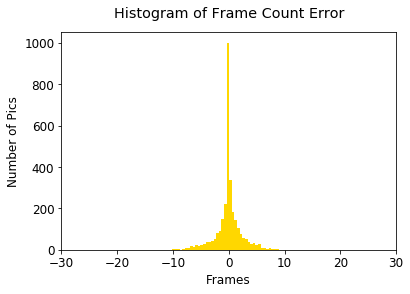


% Predictions Within 1 Frame         : 67.73%
% Predictions Within 2 Frames        : 79.66%
% Predictions Within 3 Frames        : 87.11%
% Predictions Within 4 Frames        : 91.69%
% Predictions Within 5 Frames        : 95.41%


In [42]:
from sklearn.ensemble import RandomForestRegressor

X_test_pred_all_rf = pd.DataFrame()
perform_metrics_list = []
kfold = KFold(10, True, 1)

print("rsq  adj-rsq  mae  rmse")

for train_index, test_index in kfold.split(X_train): 
    X_train1 = X_train.iloc[train_index][features]
    X_cv = X_train.iloc[test_index][features]
    y_train1 = y_train.iloc[train_index]
    y_cv = y_train.iloc[test_index]

    rfm = RandomForestRegressor(**params)
    rfm_model = rfm.fit(X_train1, y_train1)
    rfm_predict = rfm.predict(X_cv)
    perform_metrics = compute_metrics(X_cv, y_cv, rfm_predict)
    perform_metrics_list.append(perform_metrics)

    # Creating Dataframe with differences of predicted vs actual for plotting
    X_test_pred = build_error_analysis_df(X_train.iloc[test_index], y_train.iloc[test_index], rfm_predict)
    X_test_pred_all_rf = X_test_pred_all_rf.append(X_test_pred)    

metrics = {}
# Computing Performance Metrics
acc_metric_names = ['acc_within1frames', 'acc_within2frames', 'acc_within3frames', 'acc_within4frames',
                    'acc_within5frames']
frame_diff_name = 'abs_frame_diff'
metrics = report_metrics(metrics, perform_metrics_list, X_test_pred_all_rf, acc_metric_names,
                         frame_diff_name)

plot_hist(X_test_pred_all_rf)
X_test_pred_all_rfm, metrics = compute_bins(X_test_pred_all_rf, metrics)

# Computinng Binned Accuracy Meterics
acc_metric_names = ['acc_binned_within1frames', 'acc_binned_within2frames', 'acc_binned_within3frames',
                    'acc_binned_within4frames', 'acc_binned_within5frames']
frame_diff_name = 'abs_binned_frame_diff'
metrics = report_metrics(metrics, perform_metrics_list, X_test_pred_all_rf, acc_metric_names,
                         frame_diff_name, unbinned=False)

df_perform_metrics = df_perform_metrics.append([metrics]) 
    
ranks["RF"] = ranking(rfm.feature_importances_, features);

### Saving metrics to Neptune-ML

In [43]:
neptune.append_tag("Random_Forest_Regressor")

for key, val in metrics.items():
    neptune.send_metric(key, val)

### Actual vs Predicted Frame Counts

Text(0.5, 1.08, 'Actual vs. Predicted Frame Count')

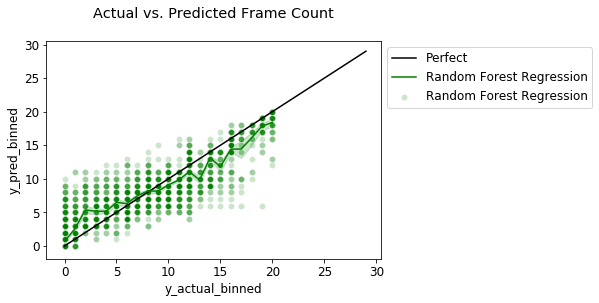

In [44]:
df_line = pd.DataFrame({'x': list(range(30)),
                        'y': list(range(30))})
ax1 = sns.lineplot(x="x", y="y", data=df_line, label='Perfect', color='black')
ax2 = sns.lineplot(x="y_actual_binned", y="y_pred_binned", data=X_test_pred_all_rfm, color = 'green',
                   label='Random Forest Regression')
ax3 = sns.scatterplot(x="y_actual_binned", y="y_pred_binned", data=X_test_pred_all_rfm, color = 'green',
                      label='Random Forest Regression', alpha=0.2)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Actual vs. Predicted Frame Count", y=1.08);
plt.savefig('actual_vs_pred_frame_count_RF.png')

In [45]:
neptune.send_image('actual_vs_pred_frame_count_RF', 'actual_vs_pred_frame_count_RF.png', 
                   name='actual_vs_pred_frame_count_RF')

In [46]:
neptune.stop()

### XGBoost Regressor

#### Grid Search

In [47]:
# import warnings
# warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
# from sklearn.model_selection import GridSearchCV


# For hyperparameter selection
# xgb = XGBRegressor()
# param_grid = {'objective':['reg:linear'],
#               'learning_rate': [.03, 0.05, .07], #so called `eta` value
#               'max_depth': [5, 6, 7],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500, 700, 1000]}
# n_jobs = 4 
# regressor = GridSearchCV(estimator=xgb, cv=None, param_grid=param_grid, n_jobs=n_jobs)
# best_est = regressor.fit(X_train[features], y_train)
# print(regressor.best_estimator_)

# print("Best Estimator Parameters")
# print("---------------------------")

# print(f"booster: {regressor.best_params_['objective']}")
# print(f"learning_rate: {regressor.best_params_['learning_rate']}")
# print(f"max_depth: {regressor.best_params_['max_depth']}")
# print 
# print(f"Train R-square: {regressor.score(X_train[features], y_train)}")

In [48]:
params= {'base_score':0.5, 
         'booster':'gbtree', 
         'colsample_bylevel':1,
         'colsample_bynode':1, 
         'colsample_bytree':0.7, 
         'gamma':0,
         'importance_type':'gain', 
         'learning_rate':0.03, 
         'max_delta_step':0,
         'max_depth':7, 
         'min_child_weight':4, 
         'missing':None, 
         'n_estimators':1000,
         'n_jobs':1, 
         'nthread':None, 
         'objective':'reg:linear', 
         'random_state':0,
         'reg_alpha':0, 
         'reg_lambda':1, 
         'scale_pos_weight':1, 
         'seed':None, 
         'silent':1,
         'subsample':0.7, 
         'verbosity':1}

In [49]:
# Create experiment to track
neptune.create_experiment(name="2019-06-23_Filt_KFoldsCV_XGBoostRegressor", 
                          params=params)

VER-30
https://ui.neptune.ml/gretchenriggs/Verifli/e/VER-30


Experiment(VER-30)

In [50]:
# Saving version of data to Neptune
data_version = sha1(np.ascontiguousarray(pd.DataFrame.to_numpy(X))).hexdigest()
neptune.send_text('data_version', data_version)

# Send number of data points used in Model Building to Neptue
neptune.send_metric('num_data_pts', len(X))

#### K-fold Cross-validation on test set

rsq  adj-rsq  mae  rmse
0.894 0.843 1.118 1.904
0.858 0.79 1.319 2.197
0.79 0.689 1.614 2.576
0.856 0.788 1.326 2.24
0.864 0.799 1.238 2.093
0.863 0.798 1.355 2.273
0.85 0.779 1.37 2.27
0.851 0.78 1.343 2.237
0.817 0.729 1.407 2.422
0.85 0.778 1.264 2.217

Mean R-squared for 10 Iterations          : 0.84931
Mean Adjusted R-squared for 10 Iterations : 0.77727
Mean MAE for 10 Iterations                : 1.3353 frames
Mean RMSE for 10 Iterations               : 2.243 frames

Mean difference for Incorrect Predictions:   2.5 frames
Median difference for Incorrect Predictions: 1.9 frames

% Predictions Within 1 Frame         : 69.62%
% Predictions Within 2 Frames        : 81.82%
% Predictions Within 3 Frames        : 87.44%
% Predictions Within 4 Frames        : 92.22%
% Predictions Within 5 Frames        : 95.08%

Min Diff: -11.337196350097656, Max Diff: 12.850892066955566


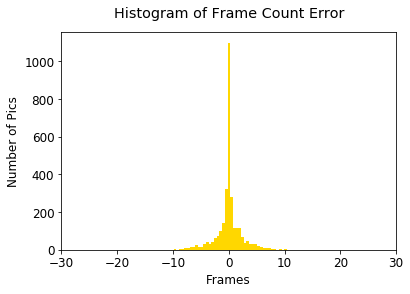


% Predictions Within 1 Frame         : 68.79%
% Predictions Within 2 Frames        : 81.22%
% Predictions Within 3 Frames        : 87.21%
% Predictions Within 4 Frames        : 91.86%
% Predictions Within 5 Frames        : 94.88%


In [51]:
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor

X_test_pred_all_xgbb = pd.DataFrame()
perform_metrics_list = []
kfold = KFold(10, True, 1)

print("rsq  adj-rsq  mae  rmse")

for train_index, test_index in kfold.split(X_train): 
    X_train1 = X_train.iloc[train_index][features]
    X_cv = X_train.iloc[test_index][features]
    y_train1 = y_train.iloc[train_index]
    y_cv = y_train.iloc[test_index]

    xgbb = XGBRegressor(**params)
    xgbb_model = xgbb.fit(X_train1, y_train1)
    xgbb_predict = xgbb.predict(X_cv)
    perform_metrics = compute_metrics(X_cv, y_cv, xgbb_predict)
    perform_metrics_list.append(perform_metrics)

    # Creating Dataframe with differences of predicted vs actual for plotting
    X_test_pred = build_error_analysis_df(X_train.iloc[test_index], y_train.iloc[test_index], xgbb_predict)
    X_test_pred_all_xgbb = X_test_pred_all_xgbb.append(X_test_pred)    

metrics = {}
# Computing Performance Metrics
acc_metric_names = ['acc_within1frames', 'acc_within2frames', 'acc_within3frames', 'acc_within4frames',
                    'acc_within5frames']
frame_diff_name = 'abs_frame_diff'
metrics = report_metrics(metrics, perform_metrics_list, X_test_pred_all_xgbb, acc_metric_names,
                         frame_diff_name)

plot_hist(X_test_pred_all_xgbb)
X_test_pred_all_xgbb, metrics = compute_bins(X_test_pred_all_xgbb, metrics)

# Computinng Binned Accuracy Meterics
acc_metric_names = ['acc_binned_within1frames', 'acc_binned_within2frames', 'acc_binned_within3frames',
                    'acc_binned_within4frames', 'acc_binned_within5frames']
frame_diff_name = 'abs_binned_frame_diff'
metrics = report_metrics(metrics, perform_metrics_list, X_test_pred_all_xgbb, acc_metric_names,
                         frame_diff_name, unbinned=False)

df_perform_metrics = df_perform_metrics.append([metrics]) 

ranks["XGB"] = ranking(xgbb.feature_importances_, features);

#### Computing Binned Accuracy for Daytime: > 1 hour after sunrise, < 12 hours after sunrise

In [52]:
hour_start = 1
hour_end = 12
X_test_pred_all_xgb_day = X_test_pred_all_xgbb[(X_test_pred_all_xgbb['hrs_from_sunrise'] > hour_start) &
                                               (X_test_pred_all_xgbb['hrs_from_sunrise'] < hour_end)].copy()

# Computing Frame Accuracy
acc_metric_names = ['acc_day_within1frames', 'acc_day_within2frames', 'acc_day_within3frames',
                    'acc_day_within4frames', 'acc_day_within5frames']
frame_diff_name = 'abs_binned_frame_diff'

metrics = report_metrics(metrics, perform_metrics_list, X_test_pred_all_xgb_day, acc_metric_names,
                         frame_diff_name, unbinned=False)


% Predictions Within 1 Frame         : 51.24%
% Predictions Within 2 Frames        : 67.66%
% Predictions Within 3 Frames        : 76.52%
% Predictions Within 4 Frames        : 83.58%
% Predictions Within 5 Frames        : 88.86%


#### Computing Binned Accuracy for <= 1 hour after sunrise, >= 12 hours after sunrise

In [53]:
hour_start = 1
hour_end = 12
X_test_pred_all_xgb_night = X_test_pred_all_xgbb[(X_test_pred_all_xgbb['hrs_from_sunrise'] <= hour_start) | 
                                                 (X_test_pred_all_xgbb['hrs_from_sunrise'] >= hour_end)].copy()

# Computing Binned Frame Accuracy
acc_metric_names = ['acc_night_within1frames', 'acc_night_within2frames', 'acc_night_within3frames',
                    'acc_night_within4frames','acc_night_within5frames']
frame_diff_name = 'abs_binned_frame_diff'

metrics = report_metrics(metrics, perform_metrics_list, X_test_pred_all_xgb_night, acc_metric_names,
                         frame_diff_name, unbinned=False)


% Predictions Within 1 Frame         : 77.59%
% Predictions Within 2 Frames        : 88.02%
% Predictions Within 3 Frames        : 92.56%
% Predictions Within 4 Frames        : 96.01%
% Predictions Within 5 Frames        : 97.90%


#### Computing Binned Accuracy for Double Deeps

In [54]:
X_test_pred_all_xgb_dd = X_test_pred_all_xgbb[(X_test_pred_all_xgbb['Deep10'] == 2) & 
                                              (X_test_pred_all_xgbb['total boxes'] == 2)].copy()
print(X_test_pred_all_xgb_dd.shape)

# Computing Binned Frame Accuracy
acc_metric_names = ['acc_DoubleDeep_within1frames', 'acc_DoubleDeep_within2frames', 'acc_DoubleDeep_within3frames',
                    'acc_DoubleDeep_within4frames', 'acc_DoubleDeep_within5frames']
frame_diff_name = 'abs_binned_frame_diff'

metrics = report_metrics(metrics, perform_metrics_list, X_test_pred_all_xgb_dd, acc_metric_names,
                         frame_diff_name, unbinned=False)

(871, 153)

% Predictions Within 1 Frame         : 57.18%
% Predictions Within 2 Frames        : 73.94%
% Predictions Within 3 Frames        : 82.89%
% Predictions Within 4 Frames        : 90.47%
% Predictions Within 5 Frames        : 95.06%


#### Computing Binned Accuracy for Story & a Halves

In [55]:
X_test_pred_all_xgb_sh = X_test_pred_all_xgbb[((X_test_pred_all_xgbb['Deep10'] == 1) & 
                                               (X_test_pred_all_xgbb['Med10'] == 1)) &
                                               (X_test_pred_all_xgbb['total boxes'] == 1.64)].copy()
print(X_test_pred_all_xgb_sh.shape)

# Computing Binned Frame Accuracy
acc_metric_names = ['acc_StoryHalf_within1frames', 'acc_StoryHalf_within2frames', 'acc_StoryHalf_within3frames',
                    'acc_StoryHalf_within4frames','acc_StoryHalf_within5frames']
frame_diff_name = 'abs_binned_frame_diff'

metrics = report_metrics(metrics, perform_metrics_list, X_test_pred_all_xgb_sh, acc_metric_names,
                         frame_diff_name, unbinned=False)

(253, 153)

% Predictions Within 1 Frame         : 92.49%
% Predictions Within 2 Frames        : 97.23%
% Predictions Within 3 Frames        : 98.42%
% Predictions Within 4 Frames        : 99.60%
% Predictions Within 5 Frames        : 100.00%


#### Computing Binned Accuracy for Dead Hives (Frame Strength = 0)

In [56]:
X_test_pred_all_xgb_dead = X_test_pred_all_xgbb[X_test_pred_all_xgbb['frame strength'] == 0].copy()

# Computing Frame Accuracy
acc_metric_names = ['acc_dead_within1frames', 'acc_dead_within2frames', 'acc_dead_within3frames',
                    'acc_dead_within4frames', 'acc_dead_within5frames']
frame_diff_name = 'abs_binned_frame_diff'

metrics = report_metrics(metrics, perform_metrics_list, X_test_pred_all_xgb_dead, acc_metric_names,
                         frame_diff_name, unbinned=False)


% Predictions Within 1 Frame         : 90.03%
% Predictions Within 2 Frames        : 92.05%
% Predictions Within 3 Frames        : 93.35%
% Predictions Within 4 Frames        : 95.09%
% Predictions Within 5 Frames        : 95.81%


#### Computing Binned Accuracy for Live Hives (Frame Strength > 0)

In [57]:
X_test_pred_all_xgb_live = X_test_pred_all_xgbb[X_test_pred_all_xgbb['frame strength'] > 0].copy()

# Computing Frame Accuracy
acc_metric_names = ['acc_live_within1frames', 'acc_live_within2frames', 'acc_live_within3frames',
                    'acc_live_within4frames', 'acc_live_within5frames']
frame_diff_name = 'abs_binned_frame_diff'

metrics = report_metrics(metrics, perform_metrics_list, X_test_pred_all_xgb_live, acc_metric_names,
                         frame_diff_name, unbinned=False)


% Predictions Within 1 Frame         : 62.45%
% Predictions Within 2 Frames        : 77.99%
% Predictions Within 3 Frames        : 85.37%
% Predictions Within 4 Frames        : 90.89%
% Predictions Within 5 Frames        : 94.61%


### Saving metrics to Neptune-ML

In [58]:
neptune.append_tag("XGBoost_Regressor")

for key, val in metrics.items():
    neptune.send_metric(key, val)

### Predicted vs Actual Frame Counts

Text(0.5, 1.08, 'Actual vs. Predicted Frame Count')

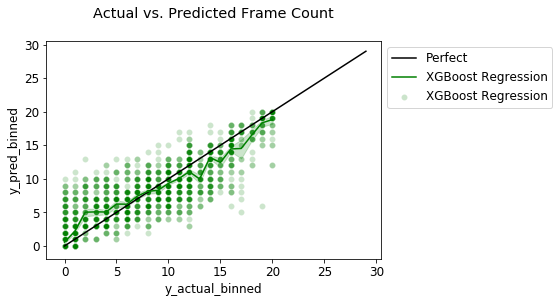

In [59]:
df_line = pd.DataFrame({'x': list(range(30)),
                        'y': list(range(30))})
ax1 = sns.lineplot(x="x", y="y", data=df_line, label='Perfect', color='black')
ax2 = sns.lineplot(x="y_actual_binned", y="y_pred_binned", data=X_test_pred_all_xgbb, color = 'green',
                   label='XGBoost Regression')
ax3 = sns.scatterplot(x="y_actual_binned", y="y_pred_binned", data=X_test_pred_all_xgbb, color = 'green',
                      label='XGBoost Regression', alpha=0.2)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Actual vs. Predicted Frame Count", y=1.08);
plt.savefig('actual_vs_pred_frame_count_XGB.png')

In [60]:
neptune.send_image('actual_vs_pred_frame_count_XGB', 'actual_vs_pred_frame_count_XGB.png', 
                   name='actual_vs_pred_frame_count_XGB')

In [61]:
neptune.stop()

### Checking feature importance

In [93]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in features:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in features:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	DTree	Lasso	LinReg	RF	XGB	Mean
apparenttemperature	0.0	0.0	0.0	0.07	0.02	0.02
apparenttemperaturehigh	0.01	0.0	0.0	0.08	0.1	0.04
apparenttemperaturelow	0.0	0.04	0.0	0.09	0.08	0.04
cloudcover	0.0	0.06	0.0	0.03	0.02	0.02
cloudcoverdaily	0.0	0.04	0.0	0.05	0.03	0.02
dewpoint	0.08	0.0	0.0	0.11	0.07	0.05
dewpointddaily	0.0	0.0	0.0	0.1	0.11	0.04
entropy_allimg	0.0	0.07	0.0	0.05	0.01	0.03
entropy_max_16x8	0.02	0.06	0.0	0.17	0.03	0.06
entropy_max_32x16	0.0	0.05	0.0	0.06	0.01	0.02
entropy_max_4x2	0.0	0.0	0.0	0.28	0.02	0.06
entropy_max_8x4	0.0	0.17	0.0	0.19	0.01	0.07
entropy_mean_16x8	0.0	0.04	0.0	0.41	0.01	0.09
entropy_mean_32x16	0.0	0.0	0.0	0.27	0.04	0.06
entropy_mean_4x2	0.0	0.17	0.0	0.29	0.08	0.11
entropy_mean_8x4	0.0	0.0	0.0	0.37	0.05	0.08
entropy_median_16x8	0.0	0.0	0.0	0.4	0.1	0.1
entropy_median_32x16	0.13	0.0	0.0	0.31	0.06	0.1
entropy_median_4x2	0.0	0.3	0.0	0.3	0.02	0.12
entropy_median_8x4	0.01	0.02	0.0	0.4	0.03	0.09
entropy_min_16x8	0.0	0.04	0.0	0.04	0.01	0.02
entropy_min_32x16	0.0	0.02

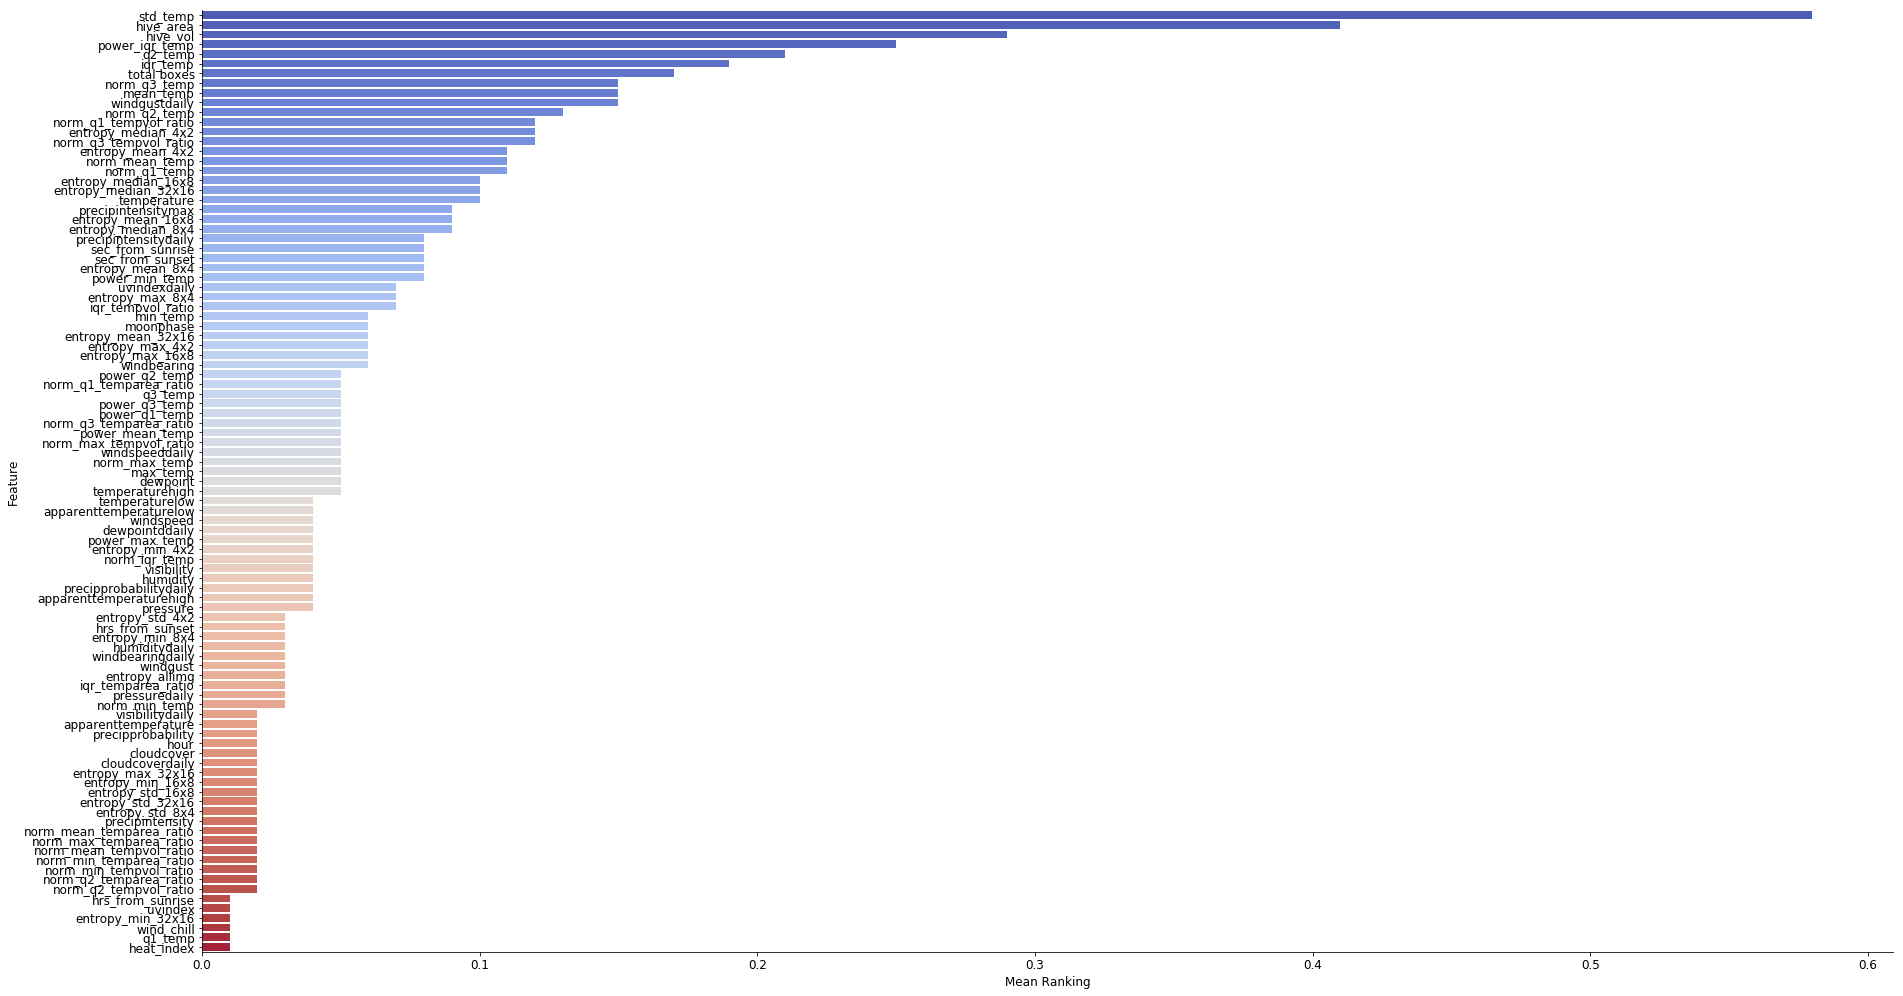

In [94]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm')

In [95]:
features_upd = np.sort(meanplot[meanplot['Mean Ranking'] >= 0.09]['Feature'].values)
features_upd

array(['entropy_mean_16x8', 'entropy_mean_4x2', 'entropy_median_16x8',
       'entropy_median_32x16', 'entropy_median_4x2', 'entropy_median_8x4',
       'hive_area', 'hive_vol', 'iqr_temp', 'mean_temp', 'norm_mean_temp',
       'norm_q1_temp', 'norm_q1_tempvol_ratio', 'norm_q2_temp',
       'norm_q3_temp', 'norm_q3_tempvol_ratio', 'power_iqr_temp',
       'precipintensitymax', 'q2_temp', 'std_temp', 'temperature',
       'total boxes', 'windgustdaily'], dtype=object)

### Evaluating best models on Holdout (Test) set

#### Random Forest

In [96]:
params= {'bootstrap':True, 
         'criterion':'mse', 
         'max_depth':None,
         'max_features':'sqrt', 
         'max_leaf_nodes':None,
         'min_impurity_decrease':0.0, 
         'min_impurity_split':None,
         'min_samples_leaf':1, 
         'min_samples_split':4,
         'min_weight_fraction_leaf':0.0, 
         'n_estimators':400, 
         'n_jobs':None,
         'oob_score':False, 
         'random_state':None, 
         'verbose':0, 
         'warm_start':False}

In [97]:
# Create experiment to track
neptune.create_experiment(name="2019-06-23_Filt_TestCV_RandomForestRegressor", 
                          params=params)

VER-22
https://ui.neptune.ml/gretchenriggs/Verifli/e/VER-22


Experiment(VER-22)

In [98]:
# Saving version of data to Neptune
data_version = sha1(np.ascontiguousarray(pd.DataFrame.to_numpy(X))).hexdigest()
neptune.send_text('data_version', data_version)

# Send number of data points used in Model Building to Neptue
neptune.send_metric('num_data_pts', len(X))

In [100]:
# Train model on entire Training set
rfm = RandomForestRegressor(**params)
rfm_model = rfm.fit(X_train[features], y_train)

rfm_predict_test = rfm.predict(X_test[features])

metrics = {}
metrics['rsq'] = r2_score(y_test, rfm_predict_test)
metrics['adj_rsq'] = 1 - (1-metrics['rsq'])*(len(y_test)-1)/(len(y_test-X_test.shape[1]-1))
metrics['mae'] = mean_absolute_error(y_test, rfm_predict_test)
metrics['rmse'] = sqrt(mean_squared_error(y_test, rfm_predict_test))

#### Getting dataframe with prediction errors

In [101]:
X_test_w_pred_rfm_test = X_test.copy()
X_test_w_pred_rfm_test.reset_index(inplace=True)
df_y_test_rfm_test = pd.DataFrame({'y_actual': y_test})
df_y_test_rfm_test.reset_index(inplace=True)
X_test_w_pred_rfm_test['y_actual'] = df_y_test_rfm_test['y_actual'].values
X_test_w_pred_rfm_test['y_pred'] = rfm_predict_test
X_test_w_pred_rfm_test['frame_diff'] = X_test_w_pred_rfm_test['y_actual'] - X_test_w_pred_rfm_test['y_pred']
X_test_w_pred_rfm_test['abs_frame_diff'] = abs(X_test_w_pred_rfm_test['y_actual'] - X_test_w_pred_rfm_test['y_pred'])

print(f"R-squared          : {metrics['rsq']:1.5}")
print(f"Adjusted R-squared : {metrics['adj_rsq']:1.5}")
print(f"MAE                : {metrics['mae']:1.5} frames")
print(f"RMSE               : {metrics['rmse']:1.5} frames")

# Mean difference for incorrect predictions
test_rfm_diff = X_test_w_pred_rfm_test['y_actual'] - X_test_w_pred_rfm_test['y_pred']
metrics['mean_frame_diff'] = abs(test_rfm_diff[test_rfm_diff >= 0.5]).mean()
metrics['median_frame_diff'] = np.median(abs(test_rfm_diff[test_rfm_diff >= 0.5]))

print()
print(f"Mean difference for Incorrect Predictions:   {metrics['mean_frame_diff']:2.2} frames")
print(f"Median difference for Incorrect Predictions: {metrics['median_frame_diff']:2.2} frames")

# Computing how many % of Within Frame Errors
metrics['acc_within1frames'] = (len(X_test_w_pred_rfm_test[X_test_w_pred_rfm_test['abs_frame_diff'] < 1.5]) / 
                                len(X_test_w_pred_rfm_test['abs_frame_diff']) * 100)
metrics['acc_within2frames'] = (len(X_test_w_pred_rfm_test[X_test_w_pred_rfm_test['abs_frame_diff'] < 2.5]) / 
                                len(X_test_w_pred_rfm_test['abs_frame_diff']) * 100)
metrics['acc_within3frames'] = (len(X_test_w_pred_rfm_test[X_test_w_pred_rfm_test['abs_frame_diff'] < 3.5]) / 
                                len(X_test_w_pred_rfm_test['abs_frame_diff']) * 100)
metrics['acc_within4frames'] = (len(X_test_w_pred_rfm_test[X_test_w_pred_rfm_test['abs_frame_diff'] < 4.5]) / 
                                len(X_test_w_pred_rfm_test['abs_frame_diff']) * 100)
metrics['acc_within5frames'] = (len(X_test_w_pred_rfm_test[X_test_w_pred_rfm_test['abs_frame_diff'] < 5.5]) / 
                                len(X_test_w_pred_rfm_test['abs_frame_diff']) * 100)
print()
print(f"% Predictions Within 1 Frame         : {metrics['acc_within1frames']:3.2f}%")
print(f"% Predictions Within 2 Frames        : {metrics['acc_within2frames']:3.2f}%")
print(f"% Predictions Within 3 Frames        : {metrics['acc_within3frames']:3.2f}%")
print(f"% Predictions Within 4 Frames        : {metrics['acc_within4frames']:3.2f}%")
print(f"% Predictions Within 5 Frames        : {metrics['acc_within5frames']:3.2f}%")

R-squared          : 0.81456
Adjusted R-squared : 0.8148
MAE                : 1.4664 frames
RMSE               : 2.4484 frames

Mean difference for Incorrect Predictions:   2.6 frames
Median difference for Incorrect Predictions: 1.9 frames

% Predictions Within 1 Frame         : 66.93%
% Predictions Within 2 Frames        : 80.08%
% Predictions Within 3 Frames        : 86.06%
% Predictions Within 4 Frames        : 91.63%
% Predictions Within 5 Frames        : 94.42%


Min Diff: -9.16309089285714, Max Diff: 13.15647199801587


Text(0.5, 0, 'Frames')

Text(0, 0.5, 'Number of Pics')

Text(0.5, 1.04, 'Histogram of Difference between\nPredicted & Actual Frame Count')

(-30, 30)

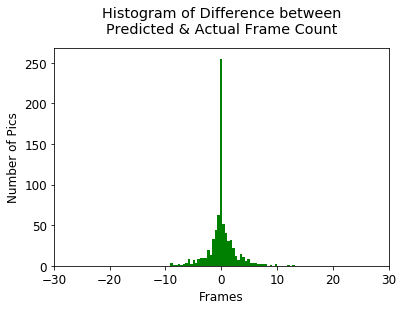

In [102]:
print(f"Min Diff: {X_test_w_pred_rfm_test['frame_diff'].min()}, Max Diff: "+
                f"{X_test_w_pred_rfm_test['frame_diff'].max()}")
(X_test_w_pred_rfm_test['frame_diff']).hist(bins=(50), color='green');
plt.xlabel("Frames")
plt.ylabel("Number of Pics")
plt.title("Histogram of Difference between\nPredicted & Actual Frame Count", y=1.04);
plt.xlim(-30,30);
plt.grid(False)

In [103]:
# Bins are 1/2 frames - Centered
bins = pd.IntervalIndex.from_tuples([(-0.5,0.5), (0.5,1.5), (1.5,2.5), (2.5,3.5), (3.5,4.5), (4.5,5.5),
                                     (5.5,6.5), (6.5,7.5), (7.5,8.5), (8.5,9.5), (9.5,10.5), (10.5,11.5),
                                     (11.5,12.5), (12.5,13.5), (13.5,14.5), (14.5,15.5), (15.5,16.5), (16.5,17.5),
                                     (17.5,18.5), (18.5,19.5), (19.5,20.5), (20.5, 100)])

# Computing binned actual frame count
fs_binned_actual = pd.cut(X_test_w_pred_rfm_test['y_actual'], bins)
fs_binned_actual = pd.DataFrame(data=fs_binned_actual)

for i in range(len(bins)):
    fs_binned_actual.loc[fs_binned_actual['y_actual'] == bins[i], 'bin_num'] = i

# Computing binned predicted frame count
fs_binned_pred = pd.cut(X_test_w_pred_rfm_test['y_pred'], bins)
fs_binned_pred = pd.DataFrame(data=fs_binned_pred)

for i in range(len(bins)):
    fs_binned_pred.loc[fs_binned_pred['y_pred'] == bins[i], 'bin_num'] = i

# Adding binned frame count to dataframe
X_test_w_pred_rfm_test['y_actual_binned'] = fs_binned_actual['bin_num']
X_test_w_pred_rfm_test['y_pred_binned'] = fs_binned_pred['bin_num']

# Computing difference & absolute binned frame error
X_test_w_pred_rfm_test['binned_frame_diff'] = X_test_w_pred_rfm_test['y_actual_binned'] - \
                                              X_test_w_pred_rfm_test['y_pred_binned']
X_test_w_pred_rfm_test['abs_binned_frame_diff'] = abs(X_test_w_pred_rfm_test['binned_frame_diff'])
X_test_w_pred_rfm_test

,index,Deep10,Deep8,Med10,Med8,Shal10,Shal8,api_call,apparenttemperature,apparenttemperaturehigh,...,windspeed,windspeeddaily,y_actual,y_pred,frame_diff,abs_frame_diff,y_actual_binned,y_pred_binned,binned_frame_diff,abs_binned_frame_diff
0,315,2.0,0.0,0.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,63.468167,88.04,...,0.039333,2.23,1.067,1.807831,-0.740831,0.740831,1.0,2.0,-1.0,1.0
1,3546,2.0,0.0,0.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,77.820667,78.78,...,9.293167,7.16,7.000,6.930116,0.069884,0.069884,7.0,7.0,0.0,0.0
2,512,2.0,0.0,0.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,84.467833,88.04,...,4.069000,2.23,0.000,4.796599,-4.796599,4.796599,0.0,5.0,-5.0,5.0
3,3099,2.0,0.0,0.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,53.121333,65.78,...,1.642833,3.59,0.000,0.756520,-0.756520,0.756520,0.0,1.0,-1.0,1.0
4,3483,2.0,0.0,0.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,79.334333,80.93,...,9.536500,7.67,6.500,7.665302,-1.165302,1.165302,6.0,8.0,-2.0,2.0
5,3035,2.0,0.0,0.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,50.691333,57.26,...,2.740000,2.18,5.000,10.168025,-5.168025,5.168025,5.0,10.0,-5.0,5.0
6,1518,0.0,0.0,2.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,69.071500,92.95,...,0.217000,2.07,11.950,11.118394,0.831606,0.831606,12.0,11.0,1.0,1.0
7,3121,2.0,0.0,0.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,53.107333,65.78,...,1.609333,3.59,1.000,4.923086,-3.923086,3.923086,1.0,5.0,-4.0,4.0
8,2006,0.0,0.0,3.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,70.994667,89.53,...,5.586667,3.54,2.560,2.113257,0.446743,0.446743,3.0,2.0,1.0,1.0
9,3607,2.0,0.0,0.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,78.223667,78.86,...,9.907667,7.22,18.000,7.993254,10.006746,10.006746,18.0,8.0,10.0,10.0


In [105]:
# Computing Binned Frame Accuracy
metrics['acc_binned_within1frames'] = (len(X_test_w_pred_rfm_test[X_test_w_pred_rfm_test['abs_binned_frame_diff'] < 1.5]) / 
                                       len(X_test_w_pred_rfm_test['abs_binned_frame_diff']) * 100)
metrics['acc_binned_within2frames'] = (len(X_test_w_pred_rfm_test[X_test_w_pred_rfm_test['abs_binned_frame_diff'] < 2.5]) / 
                                       len(X_test_w_pred_rfm_test['abs_binned_frame_diff']) * 100)
metrics['acc_binned_within3frames'] = (len(X_test_w_pred_rfm_test[X_test_w_pred_rfm_test['abs_binned_frame_diff'] < 3.5]) / 
                                       len(X_test_w_pred_rfm_test['abs_binned_frame_diff']) * 100)
metrics['acc_binned_within4frames'] = (len(X_test_w_pred_rfm_test[X_test_w_pred_rfm_test['abs_binned_frame_diff'] < 4.5]) / 
                                       len(X_test_w_pred_rfm_test['abs_binned_frame_diff']) * 100)
metrics['acc_binned_within5frames'] = (len(X_test_w_pred_rfm_test[X_test_w_pred_rfm_test['abs_binned_frame_diff'] < 5.5]) / 
                                       len(X_test_w_pred_rfm_test['abs_binned_frame_diff']) * 100)

print(f"% Predictions Within 1 Frame         : {metrics['acc_binned_within1frames']:3.2f}%")
print(f"% Predictions Within 2 Frames        : {metrics['acc_binned_within2frames']:3.2f}%")
print(f"% Predictions Within 3 Frames        : {metrics['acc_binned_within3frames']:3.2f}%")
print(f"% Predictions Within 4 Frames        : {metrics['acc_binned_within4frames']:3.2f}%")
print(f"% Predictions Within 5 Frames        : {metrics['acc_binned_within5frames']:3.2f}%")

% Predictions Within 1 Frame         : 65.34%
% Predictions Within 2 Frames        : 78.88%
% Predictions Within 3 Frames        : 85.92%
% Predictions Within 4 Frames        : 91.77%
% Predictions Within 5 Frames        : 94.56%


### Saving metrics to Neptune-ML

In [106]:
neptune.append_tag("Random_Forest_Regressor")

for key, val in metrics.items():
    neptune.send_metric(key, val)

### Actual vs Predicted Frame Counts

Text(0.5, 1.08, 'Actual vs. Predicted Frame Count')

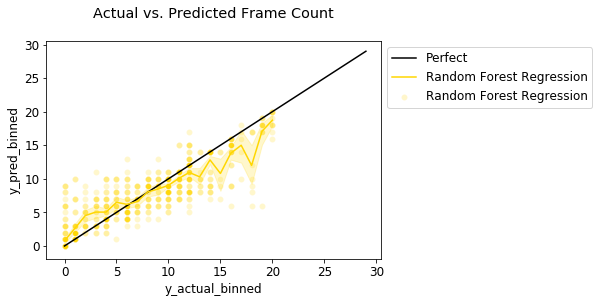

In [107]:
df_line = pd.DataFrame({'x': list(range(30)),
                        'y': list(range(30))})
ax1 = sns.lineplot(x="x", y="y", data=df_line, label='Perfect', color='black')
ax2 = sns.lineplot(x="y_actual_binned", y="y_pred_binned", data=X_test_w_pred_rfm_test, color = 'gold',
                   label='Random Forest Regression')
ax3 = sns.scatterplot(x="y_actual_binned", y="y_pred_binned", data=X_test_w_pred_rfm_test, color = 'gold',
                      label='Random Forest Regression', alpha=0.2)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Actual vs. Predicted Frame Count", y=1.08);
plt.savefig('actual_vs_pred_frame_count_RF.png')

In [108]:
neptune.send_image('actual_vs_pred_frame_count_RF', 'actual_vs_pred_frame_count_RF.png', 
                   name='actual_vs_pred_frame_count_RF')

In [109]:
neptune.stop()

#### XGBoost

In [19]:
params= {'base_score':0.5, 
         'booster':'gbtree', 
         'colsample_bylevel':1,
         'colsample_bynode':1, 
         'colsample_bytree':0.7, 
         'gamma':0,
         'importance_type':'gain', 
         'learning_rate':0.03, 
         'max_delta_step':0,
         'max_depth':7, 
         'min_child_weight':4, 
         'missing':None, 
         'n_estimators':1000,
         'n_jobs':1, 
         'nthread':None, 
         'objective':'reg:linear', 
         'random_state':0,
         'reg_alpha':0, 
         'reg_lambda':1, 
         'scale_pos_weight':1, 
         'seed':None, 
         'silent':1,
         'subsample':0.7, 
         'verbosity':1}

In [111]:
# Create experiment to track
neptune.create_experiment(name="2019-06-23_Filt_TestCV_XGBoostRegressor", 
                          params=params)

VER-23
https://ui.neptune.ml/gretchenriggs/Verifli/e/VER-23


Experiment(VER-23)

In [112]:
# Saving version of data to Neptune
data_version = sha1(np.ascontiguousarray(pd.DataFrame.to_numpy(X))).hexdigest()
neptune.send_text('data_version', data_version)

# Send number of data points used in Model Building to Neptue
neptune.send_metric('num_data_pts', len(X))

In [20]:
# Train model on entire Training set
xgbb = XGBRegressor(**params)
xgbb_model = xgbb.fit(X_train[features], y_train)
xgbb_predict_test = xgbb.predict(X_test[features])

metrics = {}
metrics['rsq'] = r2_score(y_test, xgbb_predict_test)
metrics['adj_rsq'] = 1 - (1-metrics['rsq'])*(len(y_test)-1)/(len(y_test-X_test.shape[1]-1))
metrics['mae'] = mean_absolute_error(y_test, xgbb_predict_test)
metrics['rmse'] = sqrt(mean_squared_error(y_test, xgbb_predict_test))

NameError: name 'XGBRegressor' is not defined

#### Getting dataframe with prediction errors

In [115]:
X_test_w_pred_xgbb_test = X_test.copy()
X_test_w_pred_xgbb_test.reset_index(inplace=True)
df_y_test_xgbb_test = pd.DataFrame({'y_actual': y_test})
df_y_test_xgbb_test.reset_index(inplace=True)
X_test_w_pred_xgbb_test['y_actual'] = df_y_test_xgbb_test['y_actual'].values
X_test_w_pred_xgbb_test['y_pred'] = xgbb_predict_test
X_test_w_pred_xgbb_test['frame_diff'] = X_test_w_pred_xgbb_test['y_actual'] - X_test_w_pred_xgbb_test['y_pred']
X_test_w_pred_xgbb_test['abs_frame_diff'] = abs(X_test_w_pred_xgbb_test['y_actual'] - X_test_w_pred_xgbb_test['y_pred'])

print(f"R-squared          : {metrics['rsq']:1.5}")
print(f"Adjusted R-squared : {metrics['adj_rsq']:1.5}")
print(f"MAE                : {metrics['mae']:1.5} frames")
print(f"RMSE               : {metrics['rmse']:1.5} frames")

# Mean difference for incorrect predictions
test_xgbb_diff = X_test_w_pred_xgbb_test['y_actual'] - X_test_w_pred_xgbb_test['y_pred']
metrics['mean_frame_diff'] = abs(test_xgbb_diff[test_xgbb_diff >= 0.5]).mean()
metrics['median_frame_diff'] = np.median(abs(test_xgbb_diff[test_xgbb_diff >= 0.5]))

print()
print(f"Mean difference for Incorrect Predictions:   {metrics['mean_frame_diff']:2.2} frames")
print(f"Median difference for Incorrect Predictions: {metrics['median_frame_diff']:2.2} frames")

# Computing how many % of Within Frame Errors
metrics['acc_within1frames'] = (len(X_test_w_pred_xgbb_test[X_test_w_pred_xgbb_test['abs_frame_diff'] < 1.5]) / 
                                len(X_test_w_pred_xgbb_test['abs_frame_diff']) * 100)
metrics['acc_within2frames'] = (len(X_test_w_pred_xgbb_test[X_test_w_pred_xgbb_test['abs_frame_diff'] < 2.5]) / 
                                len(X_test_w_pred_xgbb_test['abs_frame_diff']) * 100)
metrics['acc_within3frames'] = (len(X_test_w_pred_xgbb_test[X_test_w_pred_xgbb_test['abs_frame_diff'] < 3.5]) / 
                                len(X_test_w_pred_xgbb_test['abs_frame_diff']) * 100)
metrics['acc_within4frames'] = (len(X_test_w_pred_xgbb_test[X_test_w_pred_xgbb_test['abs_frame_diff'] < 4.5]) / 
                                len(X_test_w_pred_xgbb_test['abs_frame_diff']) * 100)
metrics['acc_within5frames'] = (len(X_test_w_pred_xgbb_test[X_test_w_pred_xgbb_test['abs_frame_diff'] < 5.5]) / 
                                len(X_test_w_pred_xgbb_test['abs_frame_diff']) * 100)
print()
print(f"% Predictions Within 1 Frame         : {metrics['acc_within1frames']:3.2f}%")
print(f"% Predictions Within 2 Frames        : {metrics['acc_within2frames']:3.2f}%")
print(f"% Predictions Within 3 Frames        : {metrics['acc_within3frames']:3.2f}%")
print(f"% Predictions Within 4 Frames        : {metrics['acc_within4frames']:3.2f}%")
print(f"% Predictions Within 5 Frames        : {metrics['acc_within5frames']:3.2f}%")

R-squared          : 0.81446
Adjusted R-squared : 0.8147
MAE                : 1.4214 frames
RMSE               : 2.449 frames

Mean difference for Incorrect Predictions:   2.5 frames
Median difference for Incorrect Predictions: 1.9 frames

% Predictions Within 1 Frame         : 69.32%
% Predictions Within 2 Frames        : 80.21%
% Predictions Within 3 Frames        : 86.59%
% Predictions Within 4 Frames        : 90.57%
% Predictions Within 5 Frames        : 95.22%


Min Diff: -12.018271446228027, Max Diff: 12.858797073364258


Text(0.5, 0, 'Frames')

Text(0, 0.5, 'Number of Pics')

Text(0.5, 1.04, 'Histogram of Difference between\nPredicted & Actual Frame Count')

(-30, 30)

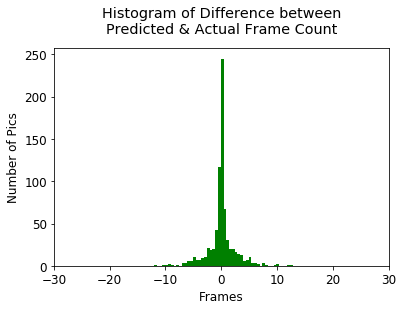

In [116]:
print(f"Min Diff: {X_test_w_pred_xgbb_test['frame_diff'].min()}, Max Diff: "+
                f"{X_test_w_pred_xgbb_test['frame_diff'].max()}")
(X_test_w_pred_xgbb_test['frame_diff']).hist(bins=(50), color='green');
plt.xlabel("Frames")
plt.ylabel("Number of Pics")
plt.title("Histogram of Difference between\nPredicted & Actual Frame Count", y=1.04);
plt.xlim(-30,30);
plt.grid(False)

In [117]:
# Bins are 1/2 frames - Centered
bins = pd.IntervalIndex.from_tuples([(-0.5,0.5), (0.5,1.5), (1.5,2.5), (2.5,3.5), (3.5,4.5), (4.5,5.5),
                                     (5.5,6.5), (6.5,7.5), (7.5,8.5), (8.5,9.5), (9.5,10.5), (10.5,11.5),
                                     (11.5,12.5), (12.5,13.5), (13.5,14.5), (14.5,15.5), (15.5,16.5), (16.5,17.5),
                                     (17.5,18.5), (18.5,19.5), (19.5,20.5), (20.5, 100)])

# Computing binned actual frame count
fs_binned_actual = pd.cut(X_test_w_pred_xgbb_test['y_actual'], bins)
fs_binned_actual = pd.DataFrame(data=fs_binned_actual)

for i in range(len(bins)):
    fs_binned_actual.loc[fs_binned_actual['y_actual'] == bins[i], 'bin_num'] = i

# Computing binned predicted frame count
fs_binned_pred = pd.cut(X_test_w_pred_xgbb_test['y_pred'], bins)
fs_binned_pred = pd.DataFrame(data=fs_binned_pred)

for i in range(len(bins)):
    fs_binned_pred.loc[fs_binned_pred['y_pred'] == bins[i], 'bin_num'] = i

# Adding binned frame count to dataframe
X_test_w_pred_xgbb_test['y_actual_binned'] = fs_binned_actual['bin_num']
X_test_w_pred_xgbb_test['y_pred_binned'] = fs_binned_pred['bin_num']

# Computing difference & absolute binned frame error
X_test_w_pred_xgbb_test['binned_frame_diff'] = X_test_w_pred_xgbb_test['y_actual_binned'] - \
                                              X_test_w_pred_xgbb_test['y_pred_binned']
X_test_w_pred_xgbb_test['abs_binned_frame_diff'] = abs(X_test_w_pred_xgbb_test['binned_frame_diff'])
X_test_w_pred_xgbb_test

,index,Deep10,Deep8,Med10,Med8,Shal10,Shal8,api_call,apparenttemperature,apparenttemperaturehigh,...,windspeed,windspeeddaily,y_actual,y_pred,frame_diff,abs_frame_diff,y_actual_binned,y_pred_binned,binned_frame_diff,abs_binned_frame_diff
0,315,2.0,0.0,0.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,63.468167,88.04,...,0.039333,2.23,1.067,0.931242,0.135758,0.135758,1.0,1.0,0.0,0.0
1,3546,2.0,0.0,0.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,77.820667,78.78,...,9.293167,7.16,7.000,7.307831,-0.307831,0.307831,7.0,7.0,0.0,0.0
2,512,2.0,0.0,0.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,84.467833,88.04,...,4.069000,2.23,0.000,4.527606,-4.527606,4.527606,0.0,5.0,-5.0,5.0
3,3099,2.0,0.0,0.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,53.121333,65.78,...,1.642833,3.59,0.000,1.630189,-1.630189,1.630189,0.0,2.0,-2.0,2.0
4,3483,2.0,0.0,0.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,79.334333,80.93,...,9.536500,7.67,6.500,8.431459,-1.931459,1.931459,6.0,8.0,-2.0,2.0
5,3035,2.0,0.0,0.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,50.691333,57.26,...,2.740000,2.18,5.000,10.955424,-5.955424,5.955424,5.0,11.0,-6.0,6.0
6,1518,0.0,0.0,2.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,69.071500,92.95,...,0.217000,2.07,11.950,10.815482,1.134518,1.134518,12.0,11.0,1.0,1.0
7,3121,2.0,0.0,0.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,53.107333,65.78,...,1.609333,3.59,1.000,4.086744,-3.086744,3.086744,1.0,4.0,-3.0,3.0
8,2006,0.0,0.0,3.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,70.994667,89.53,...,5.586667,3.54,2.560,3.431195,-0.871195,0.871195,3.0,3.0,0.0,0.0
9,3607,2.0,0.0,0.0,0.0,0.0,0.0,https://api.darksky.net/forecast/8b61bbde41621...,78.223667,78.86,...,9.907667,7.22,18.000,5.880662,12.119338,12.119338,18.0,6.0,12.0,12.0


In [119]:
# Computing Binned Frame Accuracy
metrics['acc_binned_within1frames'] = (len(X_test_w_pred_xgbb_test[X_test_w_pred_xgbb_test['abs_binned_frame_diff'] < 1.5]) / 
                                       len(X_test_w_pred_xgbb_test['abs_binned_frame_diff']) * 100)
metrics['acc_binned_within2frames'] = (len(X_test_w_pred_xgbb_test[X_test_w_pred_xgbb_test['abs_binned_frame_diff'] < 2.5]) / 
                                       len(X_test_w_pred_xgbb_test['abs_binned_frame_diff']) * 100)
metrics['acc_binned_within3frames'] = (len(X_test_w_pred_xgbb_test[X_test_w_pred_xgbb_test['abs_binned_frame_diff'] < 3.5]) / 
                                       len(X_test_w_pred_xgbb_test['abs_binned_frame_diff']) * 100)
metrics['acc_binned_within4frames'] = (len(X_test_w_pred_xgbb_test[X_test_w_pred_xgbb_test['abs_binned_frame_diff'] < 4.5]) / 
                                       len(X_test_w_pred_xgbb_test['abs_binned_frame_diff']) * 100)
metrics['acc_binned_within5frames'] = (len(X_test_w_pred_xgbb_test[X_test_w_pred_xgbb_test['abs_binned_frame_diff'] < 5.5]) / 
                                       len(X_test_w_pred_xgbb_test['abs_binned_frame_diff']) * 100)

print(f"% Predictions Within 1 Frame         : {metrics['acc_binned_within1frames']:3.2f}%")
print(f"% Predictions Within 2 Frames        : {metrics['acc_binned_within2frames']:3.2f}%")
print(f"% Predictions Within 3 Frames        : {metrics['acc_binned_within3frames']:3.2f}%")
print(f"% Predictions Within 4 Frames        : {metrics['acc_binned_within4frames']:3.2f}%")
print(f"% Predictions Within 5 Frames        : {metrics['acc_binned_within5frames']:3.2f}%")

% Predictions Within 1 Frame         : 68.53%
% Predictions Within 2 Frames        : 79.28%
% Predictions Within 3 Frames        : 85.79%
% Predictions Within 4 Frames        : 91.24%
% Predictions Within 5 Frames        : 95.22%


### Saving metrics to Neptune-ML

In [120]:
neptune.append_tag("XGBoost_Regressor")

for key, val in metrics.items():
    neptune.send_metric(key, val)

### Predicted vs Actual Frame Counts

Text(0.5, 1.08, 'Actual vs. Predicted Frame Count')

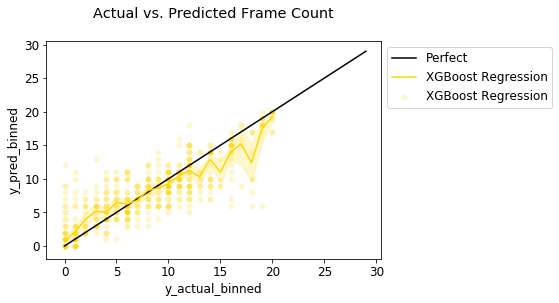

In [121]:
df_line = pd.DataFrame({'x': list(range(30)),
                        'y': list(range(30))})
ax1 = sns.lineplot(x="x", y="y", data=df_line, label='Perfect', color='black')
ax2 = sns.lineplot(x="y_actual_binned", y="y_pred_binned", data=X_test_w_pred_xgbb_test, color = 'gold',
                   label='XGBoost Regression')
ax3 = sns.scatterplot(x="y_actual_binned", y="y_pred_binned", data=X_test_w_pred_xgbb_test, color = 'gold',
                      label='XGBoost Regression', alpha=0.2)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Actual vs. Predicted Frame Count", y=1.08);
plt.savefig("actual_vs_pred_frame_count_XGB.png")

In [122]:
neptune.send_image('actual_vs_pred_frame_count_XGB', 'actual_vs_pred_frame_count_XGB.png', 
                   name='actual_vs_pred_frame_count_XGB')

In [123]:
neptune.stop()

### Creating updated model files with all data

#### Random Forest

In [124]:
params= {'bootstrap':True, 
         'criterion':'mse', 
         'max_depth':None,
         'max_features':'sqrt', 
         'max_leaf_nodes':None,
         'min_impurity_decrease':0.0, 
         'min_impurity_split':None,
         'min_samples_leaf':1, 
         'min_samples_split':4,
         'min_weight_fraction_leaf':0.0, 
         'n_estimators':400, 
         'n_jobs':None,
         'oob_score':False, 
         'random_state':None, 
         'verbose':0, 
         'warm_start':False}

In [125]:
# Train model on entire Training set
rfm = RandomForestRegressor(**params)
rfm_model = rfm.fit(X, y)
rfm_predict = rfm.predict(X)
rsq = rfm.score(X, y)
adj_rsq = 1 - (1-rsq)*(len(y)-1)/(len(y)-X.shape[1]-1)
mae = mean_absolute_error(y, rfm_predict)
rmse = sqrt(mean_squared_error(y, rfm_predict))
print("R-sq  AdjRsq MAE, RMSE")
print(round(rsq, 3), round(adj_rsq, 3), round(mae, 3), round(rmse, 3))

R-sq  AdjRsq MAE, RMSE
0.976 0.975 0.531 0.914


In [126]:
import pickle

pickle.dump(rfm_model, open(DIR + "analysis_tests/models/" + 
                            "RF_model_2019-07-15_regression_darksky_filt.pkl", 'wb'))

#### XGBoost

In [127]:
params= {'base_score':0.5, 
         'booster':'gbtree', 
         'colsample_bylevel':1,
         'colsample_bynode':1, 
         'colsample_bytree':0.7, 
         'gamma':0,
         'importance_type':'gain', 
         'learning_rate':0.03, 
         'max_delta_step':0,
         'max_depth':7, 
         'min_child_weight':4, 
         'missing':None, 
         'n_estimators':1000,
         'n_jobs':1, 
         'nthread':None, 
         'objective':'reg:linear', 
         'random_state':0,
         'reg_alpha':0, 
         'reg_lambda':1, 
         'scale_pos_weight':1, 
         'seed':None, 
         'silent':1,
         'subsample':0.7, 
         'verbosity':1}

In [128]:
from xgboost import XGBRegressor

xgbb = XGBRegressor(**params)
xgbb_model = xgbb.fit(X, y)
xgbb_predict = xgbb.predict(X)
rsq = xgbb.score(X, y)
adj_rsq = 1 - (1-rsq)*(len(y)-1)/(len(y)-X.shape[1]-1)
mae = mean_absolute_error(y, xgbb_predict)
rmse = sqrt(mean_squared_error(y, xgbb_predict))
print("R-sq  AdjRsq MAE, RMSE")
print(round(rsq, 3), round(adj_rsq, 3), round(mae, 3), round(rmse, 3))

R-sq  AdjRsq MAE, RMSE
0.998 0.998 0.154 0.229


In [129]:
import pickle

pickle.dump(xgbb_model, open(DIR + "analysis_tests/models/" + 
                            "XGB_model_2019-07-15_regression_darksky_filt.pkl", 'wb'))